# Sequential Building Blocks

When we move from basic sequential logic elements (such as latches and flip-flops) to larger systems like counters or memories, it becomes useful to group circuits into **building blocks**. This philosophy mirrors what we have already seen with combinational logic: rather than dealing with individual gates, we organize logic into functional modules that can be reused and combined.

Sequential logic benefits even more from this approach, because these circuits involve state, and reasoning about many interconnected states at the transistor or gate level would quickly become unmanageable.

Designers rely on the same core principles that guide the digital abstraction:

- **Abstraction:** each building block hides its internal implementation. For example, a register might internally use a chain of flip-flops, but from the outside we simply see a component that stores an n-bit value.
- **Hierarchy:** small, simple blocks are composed to form larger and more complex ones. A counter is made of flip-flops; an ALU may contain several counters, registers, and multiplexers; a microprocessor contains many of these subsystems.
- **Modularity:** each block has a **well-defined interface**—its inputs, outputs, and timing behavior are clearly defined. This allows us to replace one implementation with another as long as the interface remains the same.
- **Regularity:** many blocks follow patterns that repeat. A register file contains many similar registers; a memory array contains many identical cells. Repetition simplifies both design and verification.

By hiding unnecessary gate-level detail, we keep our focus on the **function** of the block rather than on its internal wiring. In many cases, the building block can be treated as a **black box**: we only need to know what it does, not how it does it.

These building blocks are the foundation of every digital system you will study. As the course progresses, we will frequently use them—individually and in combination—to build increasingly complex structures. Ultimately, these blocks allow us to assemble the architecture of a **microprocessor**, demonstrating how high-level computing behavior arises from systematic organization of simpler sequential and combinational modules.

## Counters

A **counter** is one of the simplest and most widely used sequential building blocks. Conceptually, it is a device that progresses through a well-defined sequence of binary values. If the counter is N bits wide, it moves through all the 2^N possible patterns, starting from 0 and incrementing by 1 at every clock cycle until it wraps around and starts again.

The counter advances on the **rising edge** of the clock. Each rising edge triggers a state update: the stored value is increased by one. To ensure predictable behavior, counters usually include a **reset** input. When reset is asserted, the counter ignores the clock and forces its output to 0. This is useful during system initialization, so that all parts of a digital design begin from a known state.

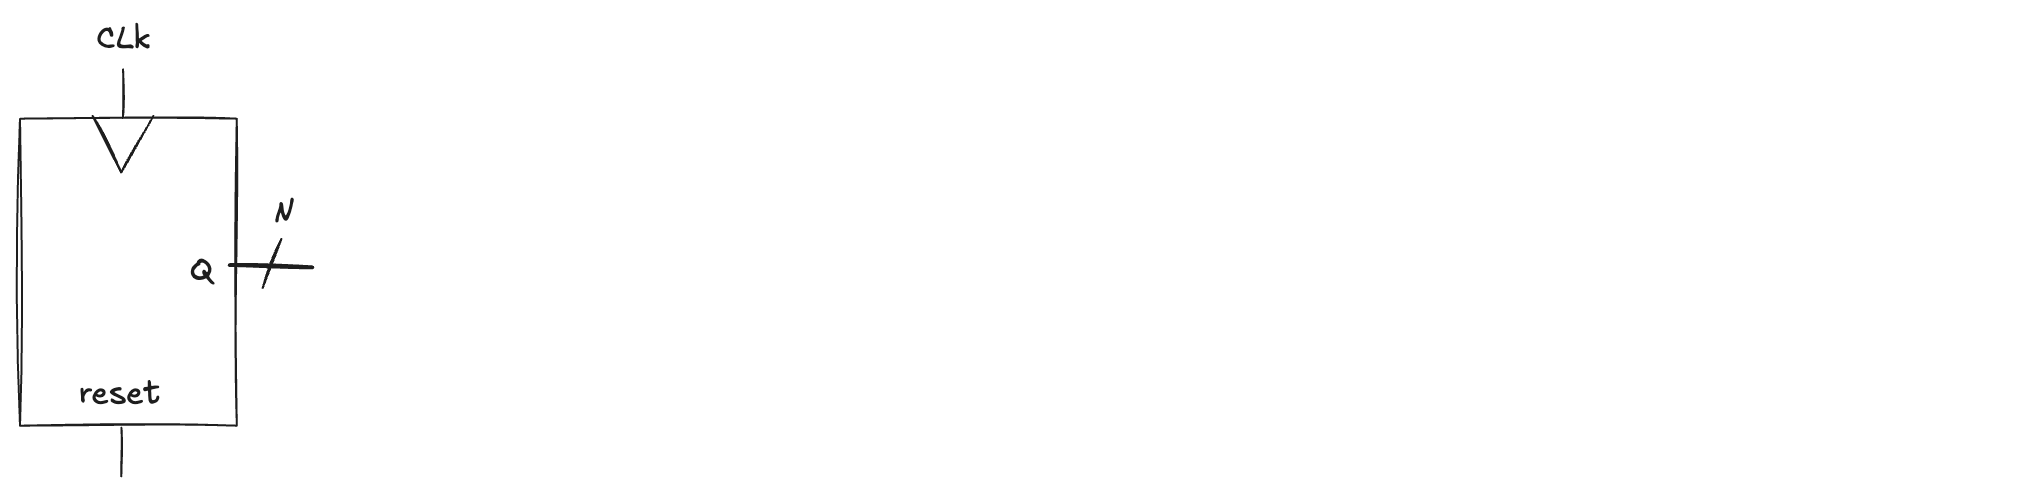

### Counter by Addition

One way to implement a counter is to use a combination of an adder and a register. The register holds the current value of the count, and the adder computes the next value by adding one to whatever is stored in the register:

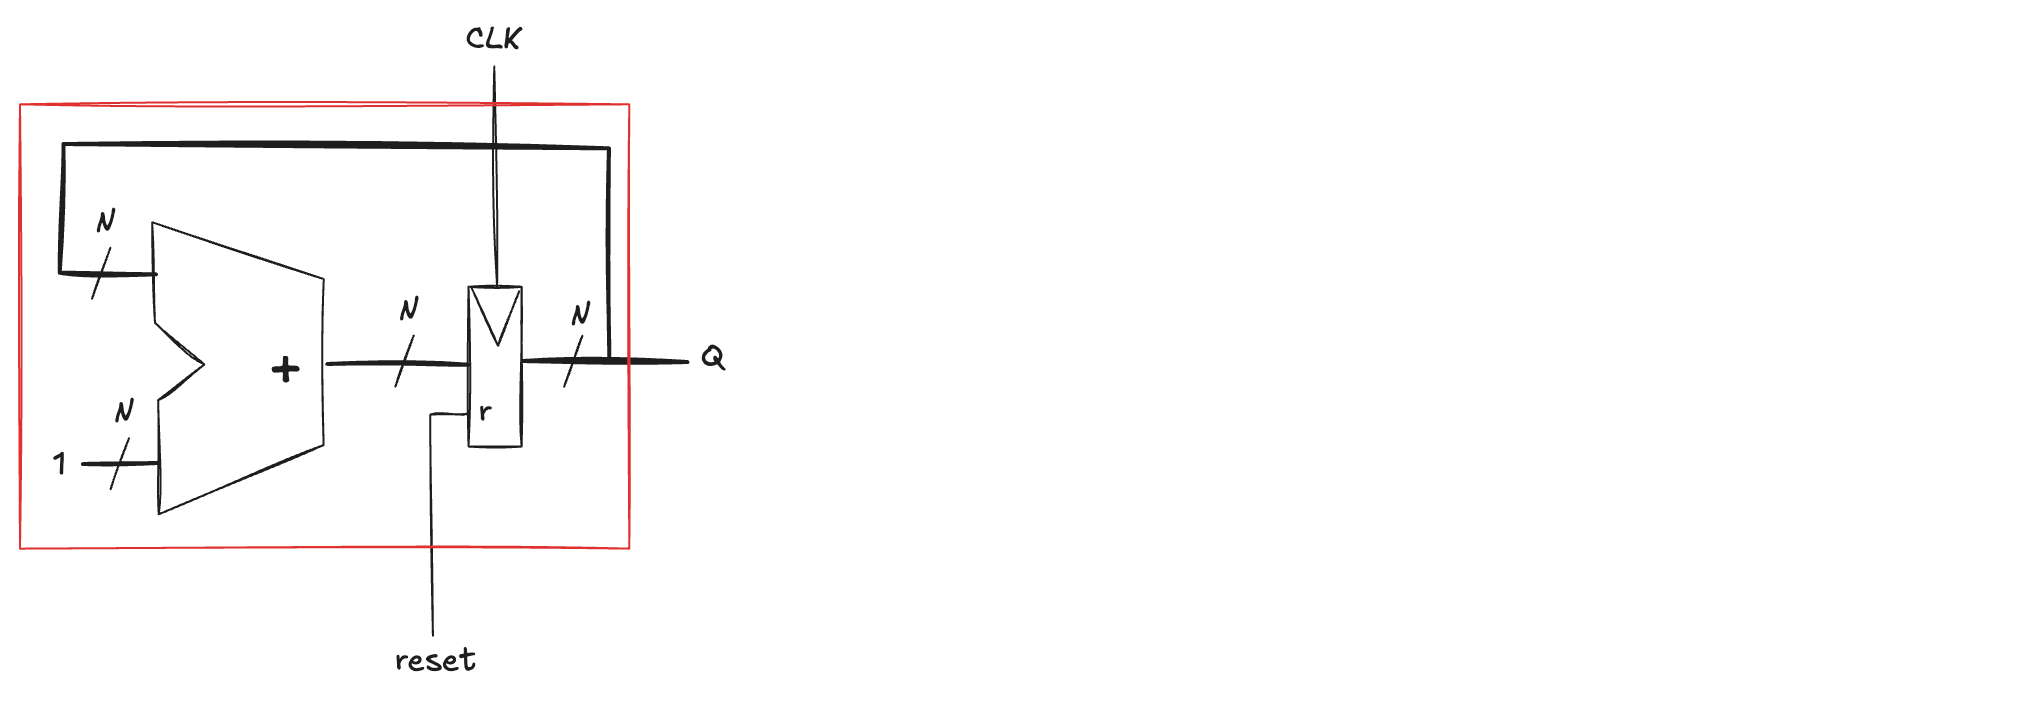

On every clock cycle, the result of the addition is written back into the register, overwriting the previous value. This simple feedback loop produces the familiar counting behavior. When viewed at the bit level, each bit of the counter toggles at a different rate: lower-order bits toggle quickly, while higher-order bits toggle only after many cycles. In fact, the most significant bit changes state only once every 2^N clock cycles.

### Frequency Divider

Counters are often used to **reduce the frequency of a fast clock signal**. Because each bit inherently divides the clock frequency by a factor of two, an N-bit counter acts as a frequency divider by:

$\displaystyle 2^{N}$

This property is especially useful when designers need to slow down fast, internal signals for observation or for external interfaces. As an example, consider a system clocked at 50 MHz. By feeding this clock into a 24-bit counter and observing the most significant bit, we obtain a signal that toggles at approximately 2.98Hz, slow enough to drive an LED that blinks at a rate visible to the human eye.

### Digitally Controlled Oscillator

A digitally controlled oscillator (DCO) is a natural extension of the counter concept. Instead of simply adding one at every clock cycle, we allow the counter to add an arbitrary integer value P. This small change gives us the ability to generate a wide range of output frequencies starting from a single reference clock. The idea is that if an N-bit counter accumulates the value P at each rising edge of the clock, the most significant bit no longer toggles once every 2^N cycles, but rather at a rate proportional to

$\displaystyle \frac{P}{2^{N}}$

The output frequency taken from the most significant bit becomes

$\displaystyle f_{\text{out}} = f_{\text{clk}} \, \frac{P}{2^{N}}$

This formula shows immediately how the designer can shape the output frequency. By choosing the counter width N and the increment value P, it becomes possible to obtain nearly any desired output rate: 

$\displaystyle \frac{P}{2^{N}} = \frac{f_{\text{out}}}{f_{\text{clk}}}$

A larger N provides finer frequency resolution because the step becomes smaller, though the cost is a wider adder and register.

As an example, consider a system driven by a 50MHz clock where the goal is to generate an output signal of approximately 500Hz. The target ratio is

$\displaystyle \frac{P}{2^{N}} = \frac{500 \text{Hz}}{50\times 10^{6} \text{Hz}} = 0.00001$

One option is to use a 24-bit register. In this case, selecting P=168 gives an output of about 500.68Hz, which is already quite close to the target. If an even more accurate value is needed, increasing the counter to 32 bits allows a better approximation. With N=32, choosing P=42.950 produces an output of roughly 500.038Hz, essentially reaching the desired frequency with much finer precision. This illustrates how the DCO technique provides a simple, flexible, and fully digital way to synthesize arbitrary frequencies without requiring analog oscillators.

## Shift Registers

A shift register is a sequential circuit specifically designed to **move data through a chain of storage elements**. At every rising edge of the clock, the register accepts a new bit from its serial input S_in and simultaneously shifts all previously stored bits one position forward. The newest bit enters the first position, the previous value of that position moves into the second, and so on, until the oldest value emerges at the serial output S_out. After each clock cycle, the entire content effectively moves one position to the right, behaving very much like a conveyor belt for bits.

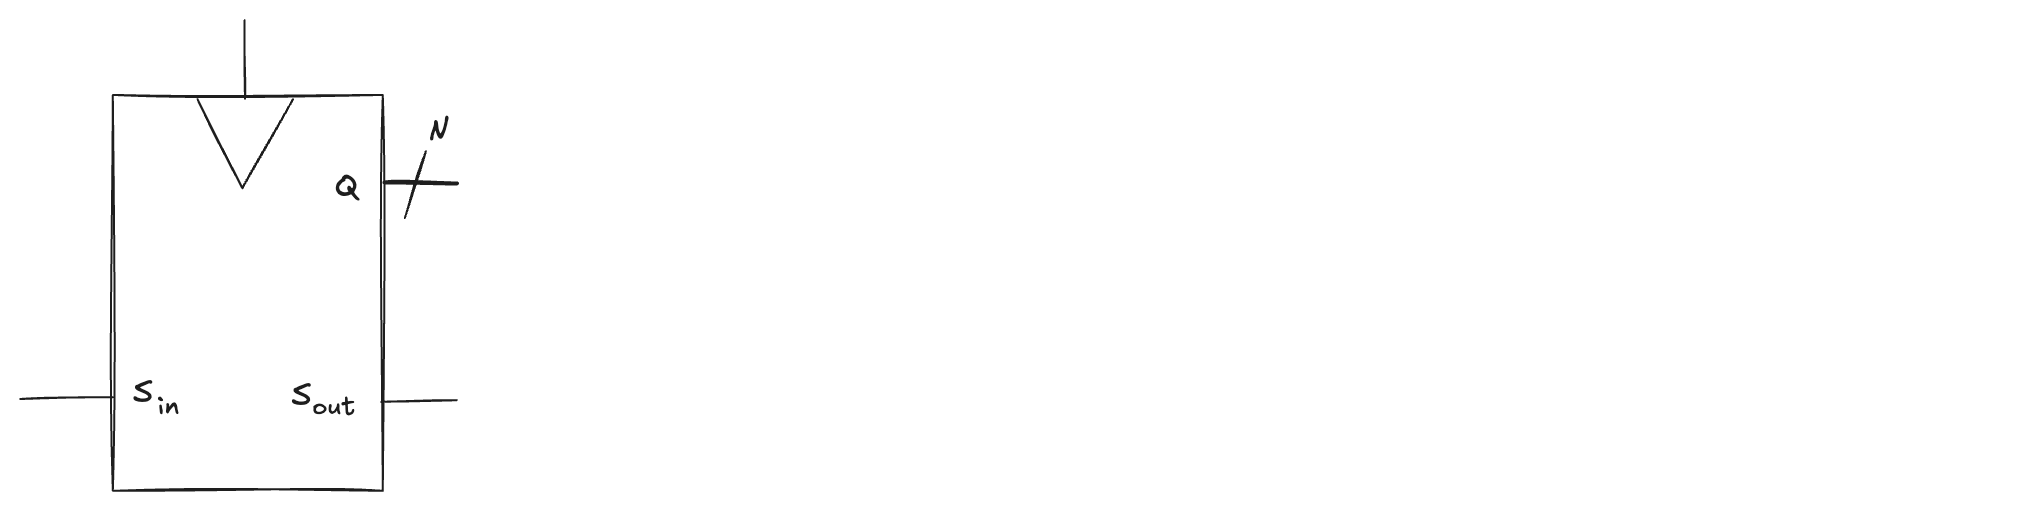

The simplest way to build a shift register is to connect N flip-flops in series, all driven by the same clock. Each flip-flop stores one bit of the register, and its output feeds the input of the next flip-flop in the chain: 

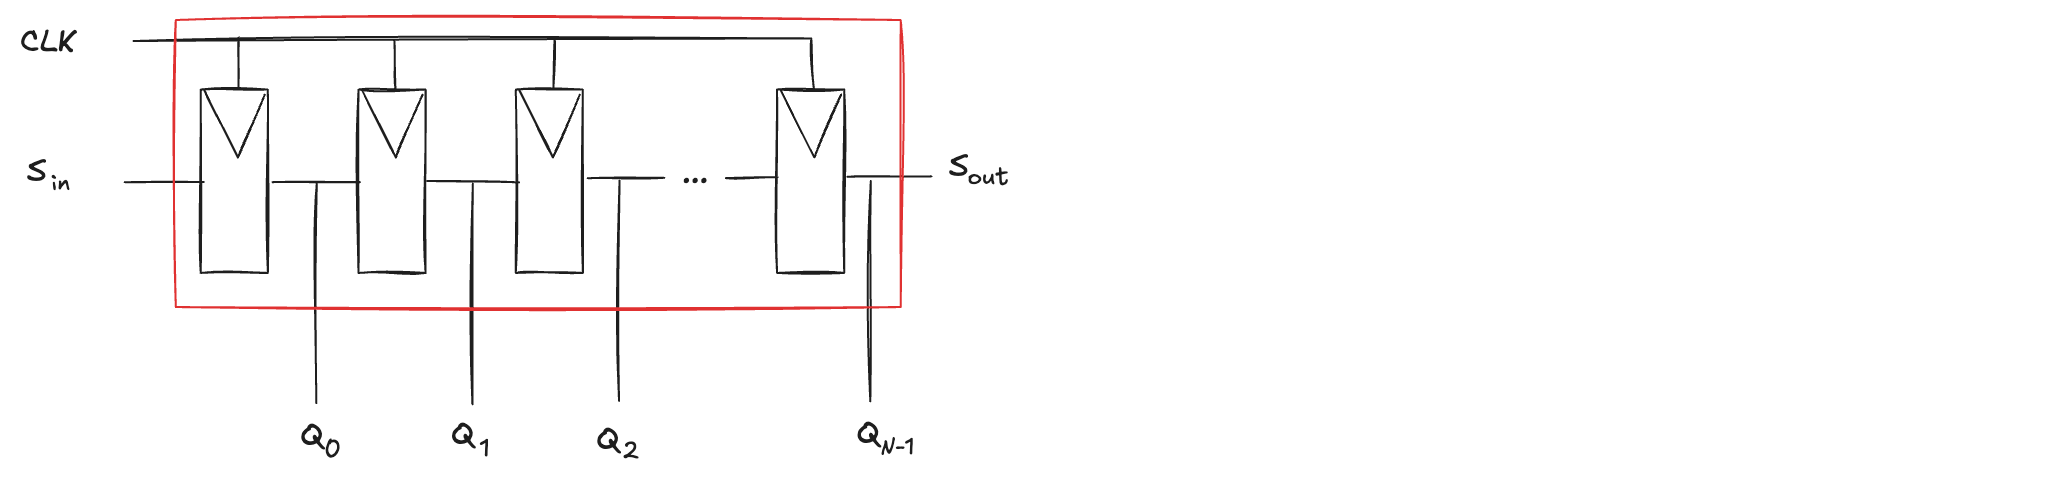

Because they all update together on the clock edge, the data moves through the system in a controlled and synchronous manner.

It is important not to confuse shift registers with shifters. Shifters are combinational circuits that shift a multi-bit input left or right by a specified amount without requiring a clock. They produce an instantaneous output as soon as the input changes. Shift registers, in contrast, rely on the clock and move data gradually, one bit per cycle.

### Serial-to-Parallel Conversion

A useful way to interpret a shift register is as a serial-to-parallel converter. The input arrives one bit at a time through S_in. After N clock cycles, the register contains the last N input bits, now available simultaneously at the parallel outputs Q. This makes shift registers extremely valuable when interfacing serial data streams with circuits that expect parallel data, such as memory modules, processors, or digital communication blocks.

### Parallel-to-Serial Conversion

Shift registers are not limited to serial-to-parallel conversion. A closely related structure is the **parallel-to-serial converter**, a circuit that performs the opposite transformation. Instead of receiving data one bit at a time, it loads an entire N-bit word simultaneously through a set of parallel inputs. Once the data is stored, the circuit shifts the bits out sequentially on each clock cycle. This method is commonly used in communication interfaces where data is processed internally in parallel form but must be transmitted serially to save wiring or bandwidth.

A standard shift register can be extended so that it supports both directions of conversion—serial-to-parallel and parallel-to-serial—within the same hardware. To achieve this dual functionality, each flip-flop in the chain receives not just the usual serial input from its neighbor but also an additional parallel input line. 

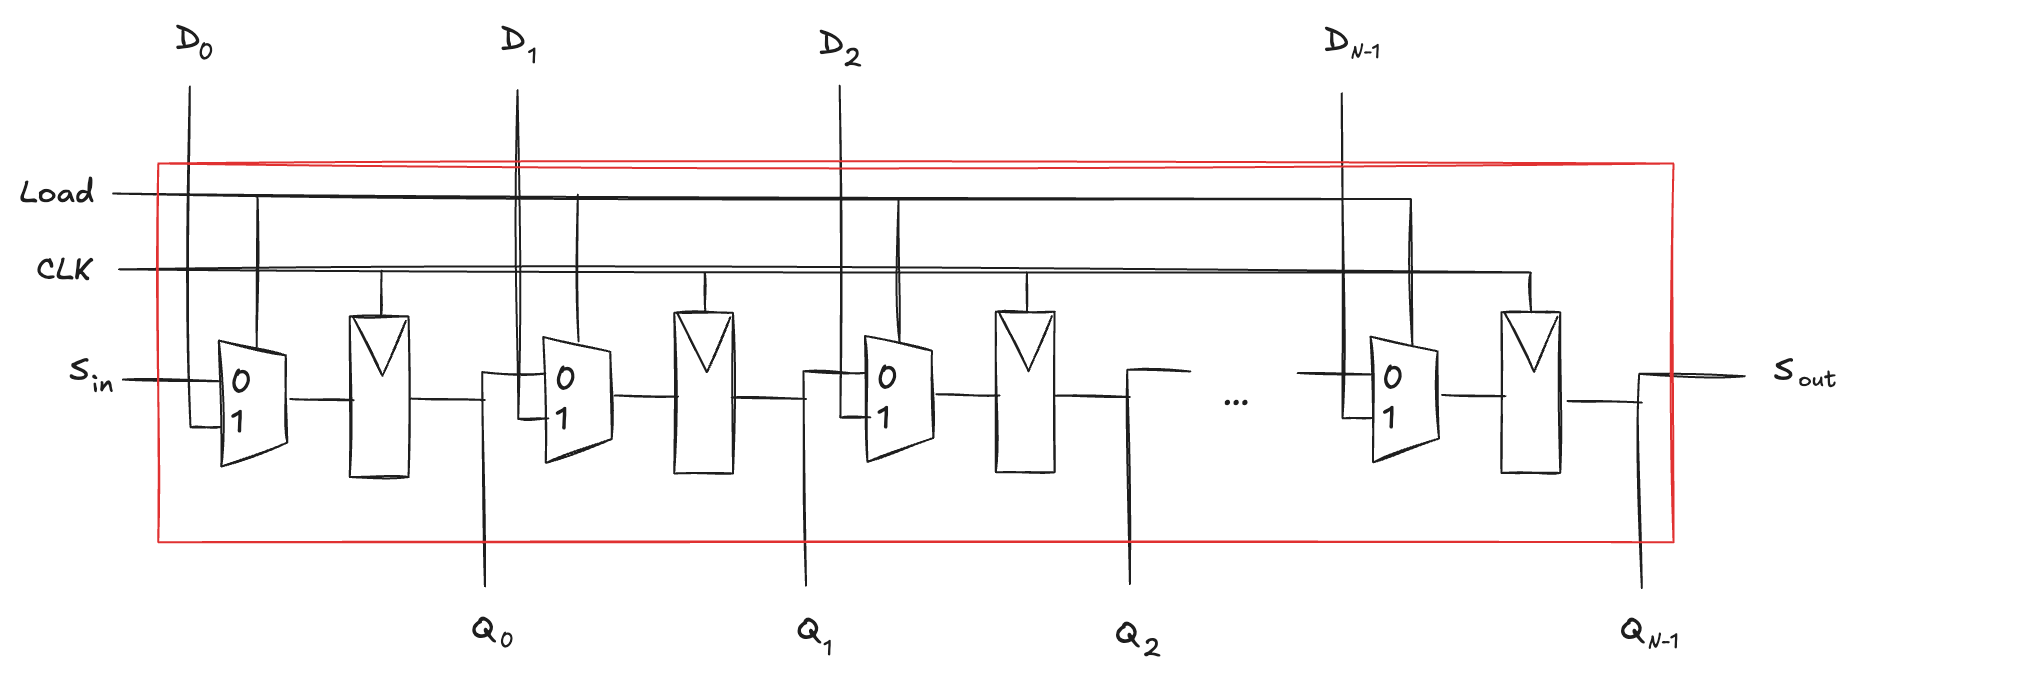

A control signal, often named **load**, determines the operating mode. When the signal is asserted, all flip-flops simultaneously capture the values present on their parallel inputs D. In this mode, the shift register acts like an array, loading an entire word in a single clock cycle. When load is not asserted, the circuit returns to its normal shifting behavior, moving data step by step from the serial input S_in toward the serial output S_out.

This flexible design makes the shift register a very versatile building block in digital systems. It can convert serial streams into parallel data for internal processing, or prepare parallel data for serial transmission. It is widely used in digital communication peripherals, input expansion modules, display drivers, and many other subsystems that must interface between different forms of data representation.

### Scan Chains

Testing digital circuits is an essential part of ensuring correct operation, but the difficulty of testing depends heavily on whether the circuit is combinational or sequential. Combinational circuits are relatively easy to test because they have no memory: every output depends only on the current inputs. To verify that such a circuit behaves correctly, the designer simply applies a set of known input patterns, called **test vectors** and checks that the resulting outputs match the expected ones.

Sequential circuits, however, are much more challenging to test because they contain internal state stored in flip-flops. The output at any moment depends not only on the present inputs but also on a long history of previous inputs. As a consequence, the **circuit may need to be stimulated with many cycles of test vectors before it reaches a specific internal state**. In some cases this becomes **impractical**. For example, verifying the correct behavior of the most significant bit of a 32-bit counter may require 2^31 clock cycles just to reach the point where that particular state is exercised. **Such long tests are completely unrealistic in real hardware testing environments**.

To overcome this problem, designers introduce a technique known as **scan chains** that exploit shif register to facilitate reaching a desired internal state quickly. The idea is to give the tester direct access to the flip-flops’ internal state. During normal operation, each flip-flop behaves as usual, loading data from its functional input D. But in test mode, the flip-flop gets input from a differentr source S_in:

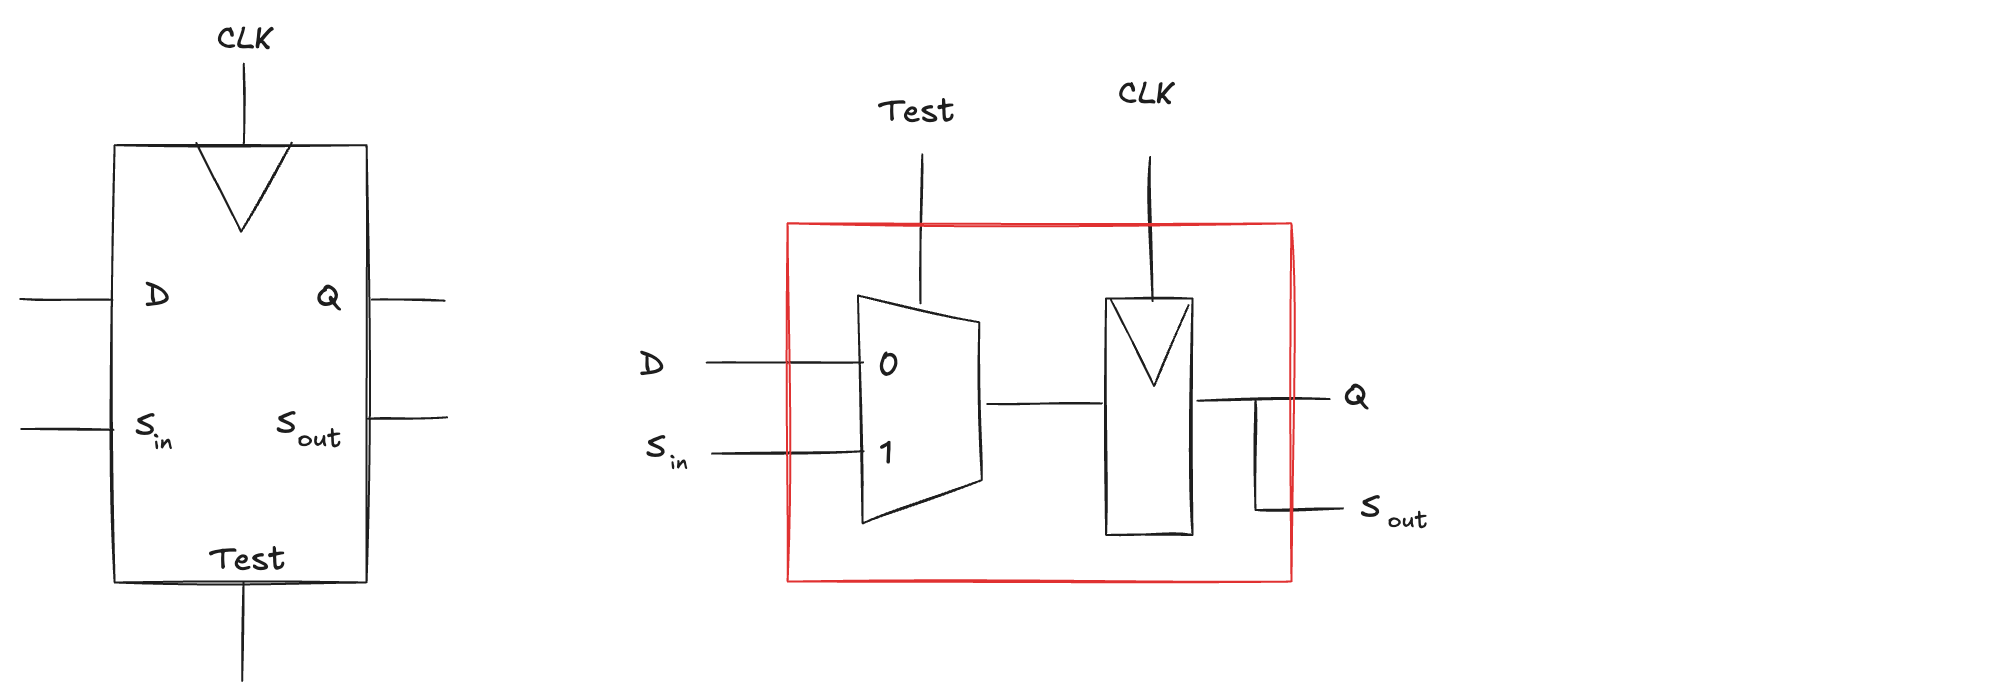

All the flip-flops are configured so that they form **one long shift register**. Their S inputs and outputs are chained together serially using, allowing the tester to **shift arbitrary values into all flip-flops** and, later, shift their contents back out for inspection. A control signal selects whether the circuit is running normally or in scan mode:

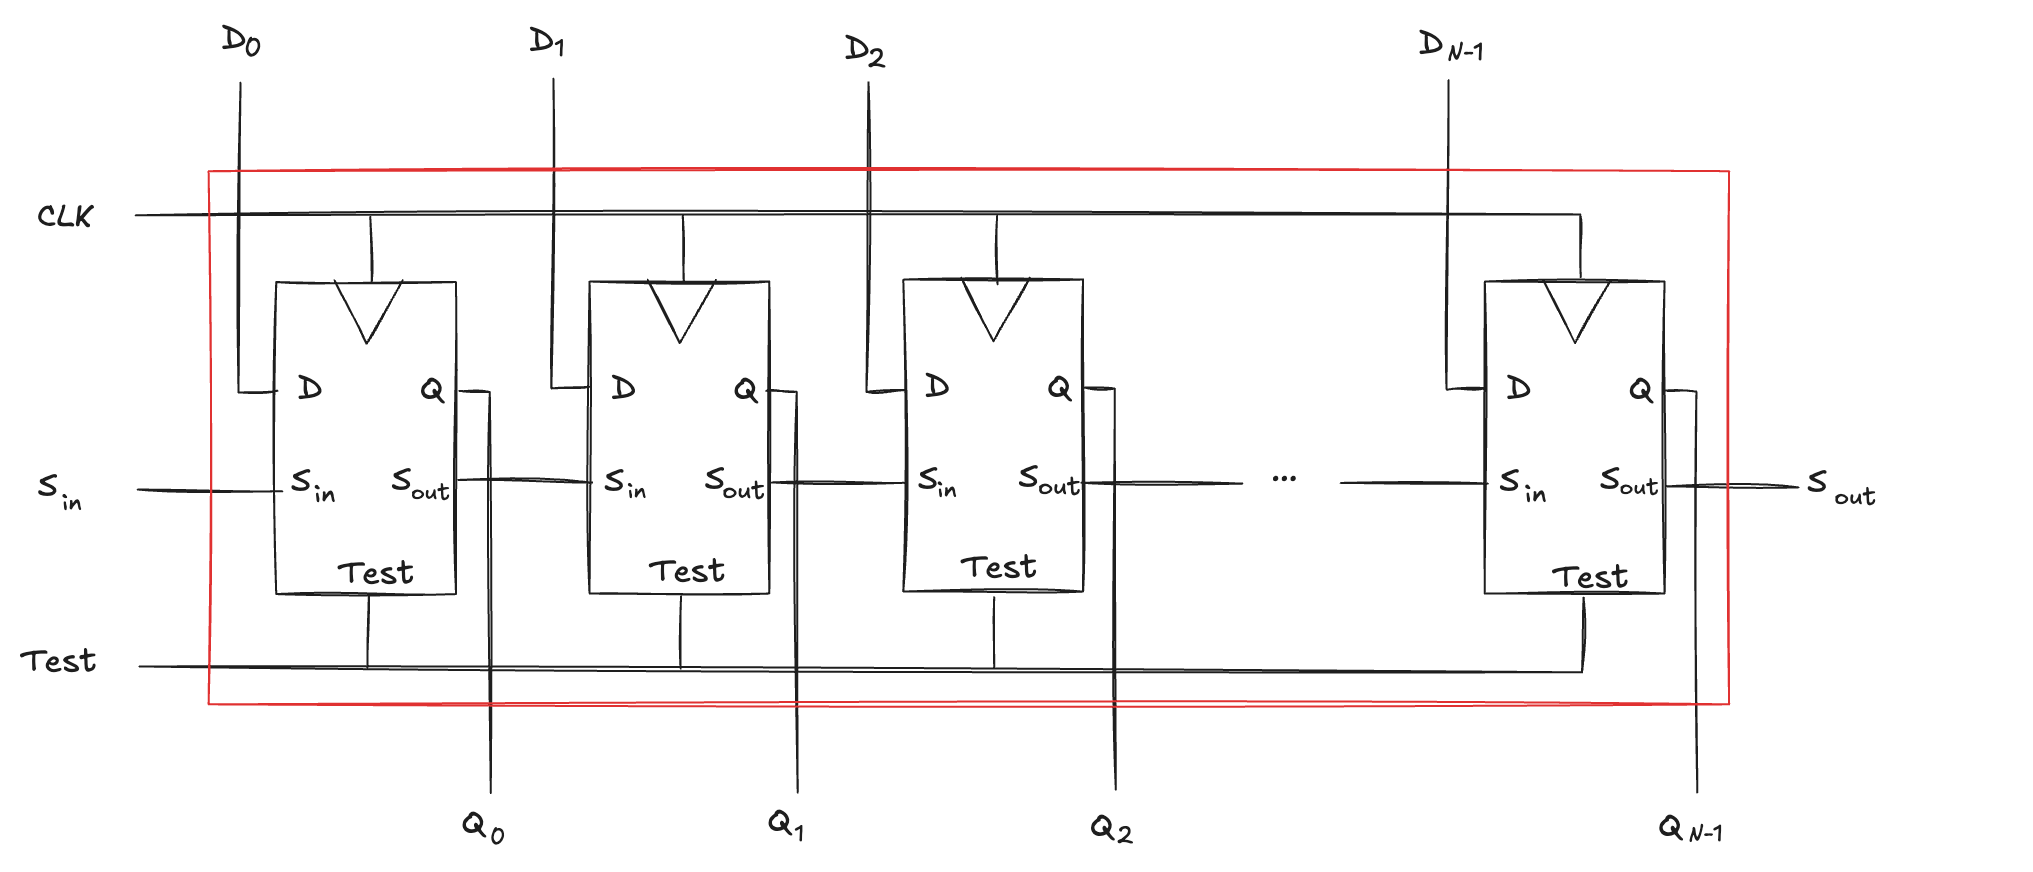

This mechanism dramatically simplifies sequential circuit testing. Instead of having to drive the circuit through a long sequence of cycles to reach a desired state, the tester can simply shift the desired bit pattern directly into the flip-flops in only N cycles, where N is the number of flip-flops. After shifting in the test state, the underlying combinational logic can be exercised for one or more clock cycles, and then the resulting state can be shifted out and examined.

Consider the example of a 32-bit counter. To test it, one could shift the pattern 0 1 1 1 1 ... 1 1 into the chain while the circuit is in test mode. After one normal counting cycle, the counter should increment this pattern and produce 1 0 0 0 0 ... 0 0. By shifting this result back out, the tester can verify that the counter increments correctly. The full test requires 32 cycles to shift in the initial pattern, one functional cycle to perform the increment, and 32 more cycles to shift out the resulting pattern, for a total of 65 cycles, far fewer than the billions of cycles that would be required without scan techniques.

Scan chains therefore transform the problem of testing complex sequential systems into something almost as straightforward as testing combinational circuits. They are now a standard feature in modern digital integrated circuits, often inserted automatically by design tools to ensure testability.

## Memories

Digital systems rely heavily on memory to store both the data they manipulate and the intermediate values produced during computation. Even the simplest circuits use some form of storage: for example, registers are a small but essential form of memory that hold temporary values inside processors, counters, or control units. While registers handle only a few bits at a time, memory arrays allow digital systems to store extremely large amounts of information efficiently.

Memories are traditionally classified according to **how they store and preserve data**. The most familiar category is **Random Access Memory** (RAM). RAM is a **volatile** form of memory, meaning that it loses its contents when power is removed. When the system is switched off, everything stored in RAM disappears. In contrast, **Read Only Memory** (ROM) is generally **non-volatile*** and it retains information even in the absence of power, making it suitable for storing firmware, boot code, or data that must survive across power cycles.

The common names RAM and ROM, however, stem from **historical distinctions** that no longer perfectly match modern technology. RAM was originally introduced to highlight the fact that it provides uniform access time to any location, unlike sequential access devices such as tape recorders, where reaching nearby data was faster than reaching distant data. ROM, on the other hand, was once genuinely "read-only" because it was manufactured with fixed contents that could not be overwritten. Today, both of these ideas are outdated. Modern ROM types not only allow random access but can also be rewritten under specific electrical conditions, while RAM technologies come in many varieties with different behaviors.

Because of this evolution, the terminology has become somewhat confusing. A ROM is not really "read-only", and a RAM is not the only memory that provides random access. For practical engineering purposes, the most meaningful distinction that remains is whether the memory is volatile or non-volatile, whether it forgets or remembers its contents when the power is turned off. This single difference strongly influences how a memory is used in digital systems and how it is integrated into larger architectures.

To appreciate how far digital memory technology has come, it is worth looking back at one of the earliest commercial computer storage systems: the IBM 305 RAMAC, introduced in 1956. 

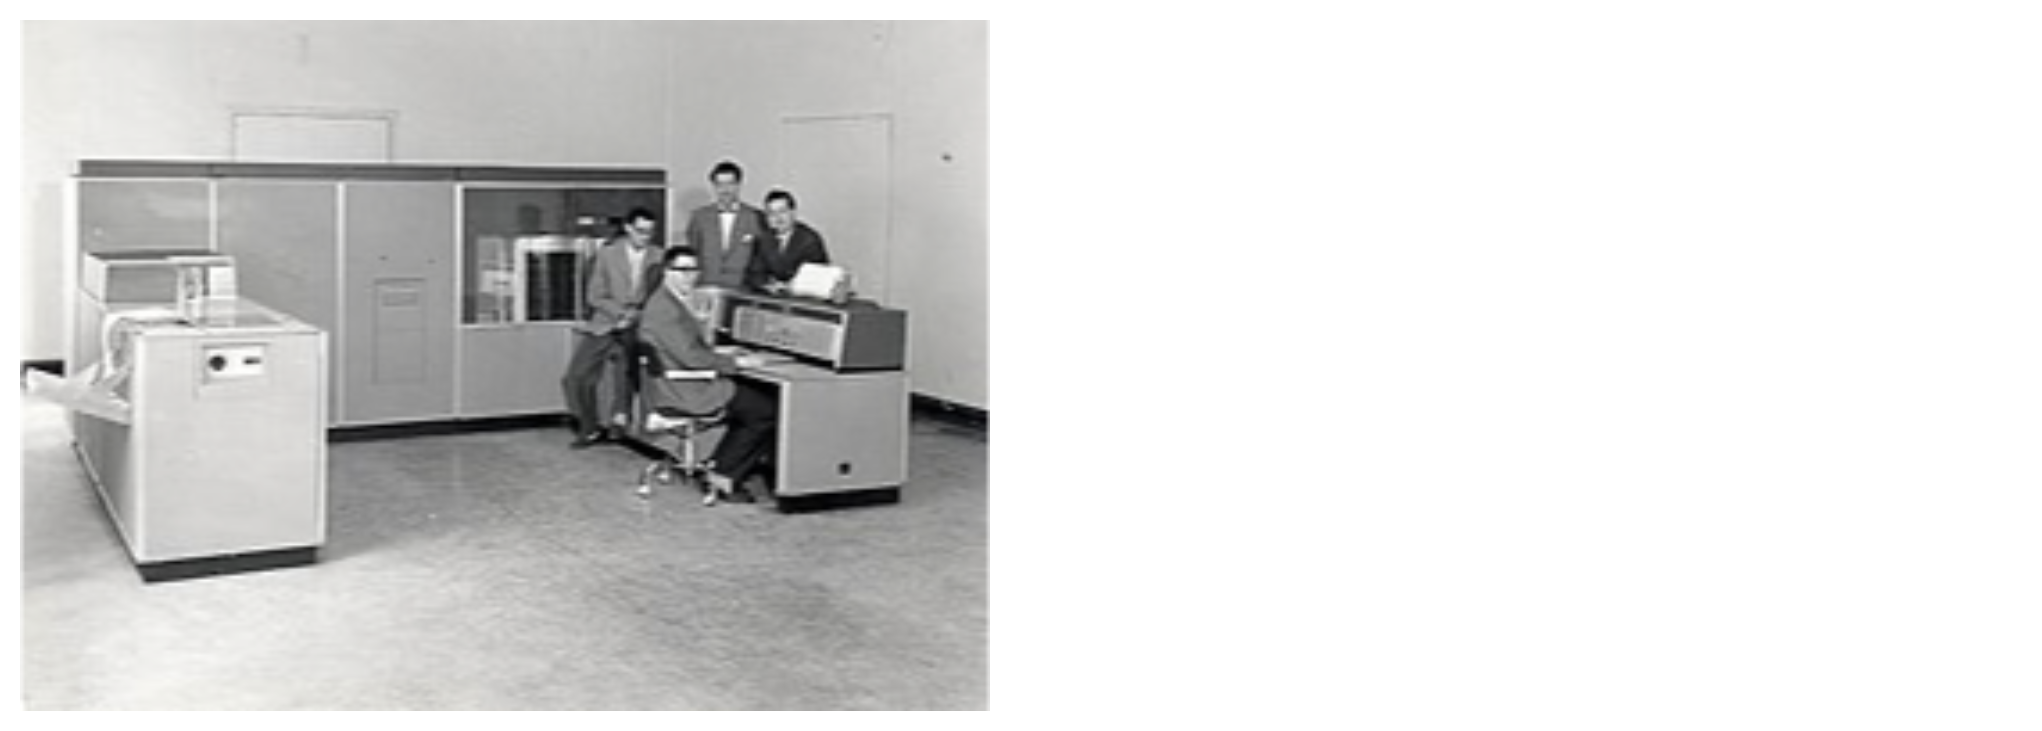

This machine was a landmark in computing history because it was the **first system to feature a hard disk drive** rather than relying on magnetic drums or punched cards. The RAMAC system consisted of several large cabinets, including a processing unit, magnetic process drum, magnetic core registers, and the electronic logic and arithmetic circuits that made up the computing engine. By today’s standards, these components appear enormous, occupying an entire room and requiring specialized operators.

The most striking detail is its storage device. The RAMAC’s hard disk held just **5 megabytes** of data, an amount so small that modern smartphones handle it without a second thought. Yet in 1956, those 5MB represented a technological breakthrough. The drive itself was physically massive as seen in historical photographs of installations:

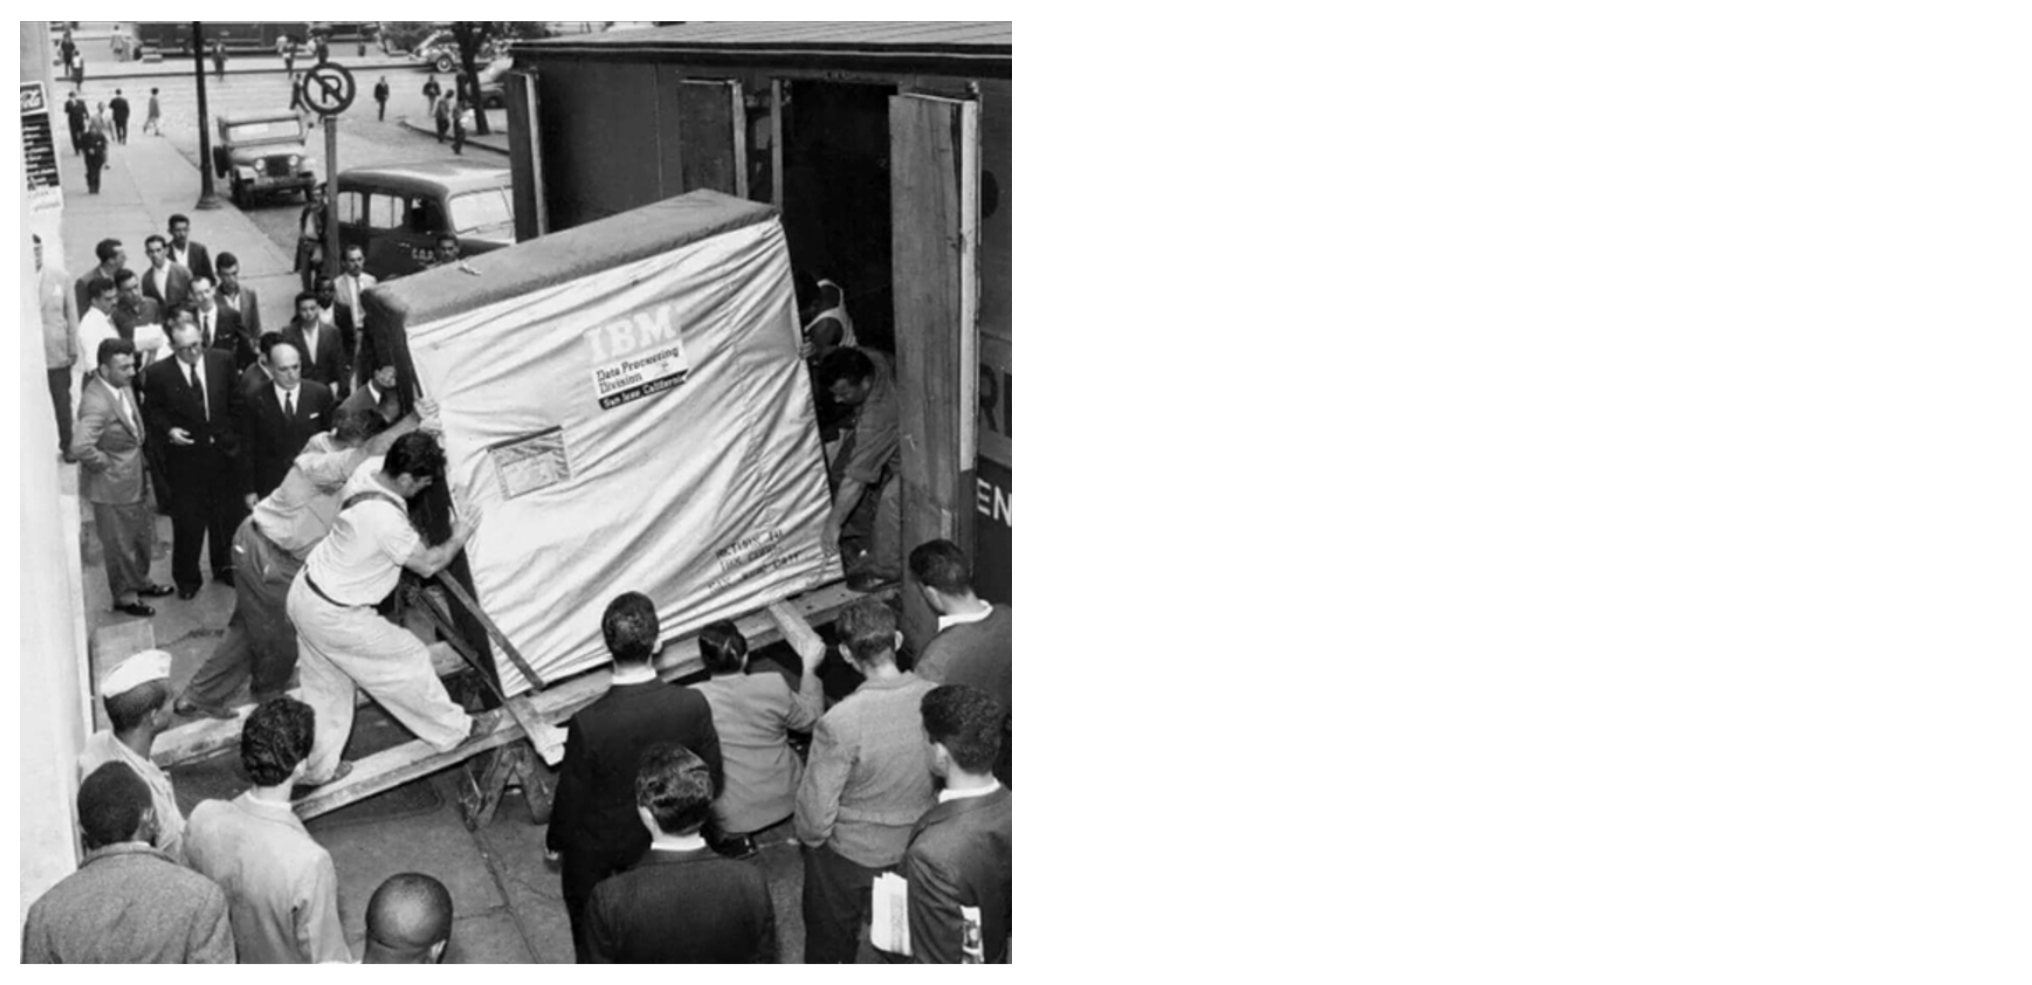



Instead of being purchased outright, the RAMAC system was typically leased to customers. The price was around 3.200 US dollars per month, which corresponds to roughly 30.000 US dollars per month in today’s currency, after adjusting for inflation. Despite this cost, companies adopted the RAMAC because it fundamentally changed the way data could be accessed and stored, offering random access to records instead of the strictly sequential access of earlier technologies.

Looking at these examples highlights the extraordinary progress in memory technology. What once required an entire room, a team of technicians, and a large financial investment is now integrated onto tiny chips costing only a few cents, while offering storage capacities millions of times larger.

### Memory Arrays

A memory device can be understood as a **two-dimensional grid of storage cells** arranged in rows and columns. Each row represents a **location** where a word of data is stored, and each column corresponds to a single bit within that word. To access a specific row, the circuit uses an **address**: a binary number that selects exactly one of the available rows. The total number of rows is referred to as the **depth** of the memory. Once the row has been chosen by the address, the bits stored in that row form the data word that is read or written. The number of bits in each word, which corresponds to the number of columns in the array, is called the **width** or **word size** of the memory.

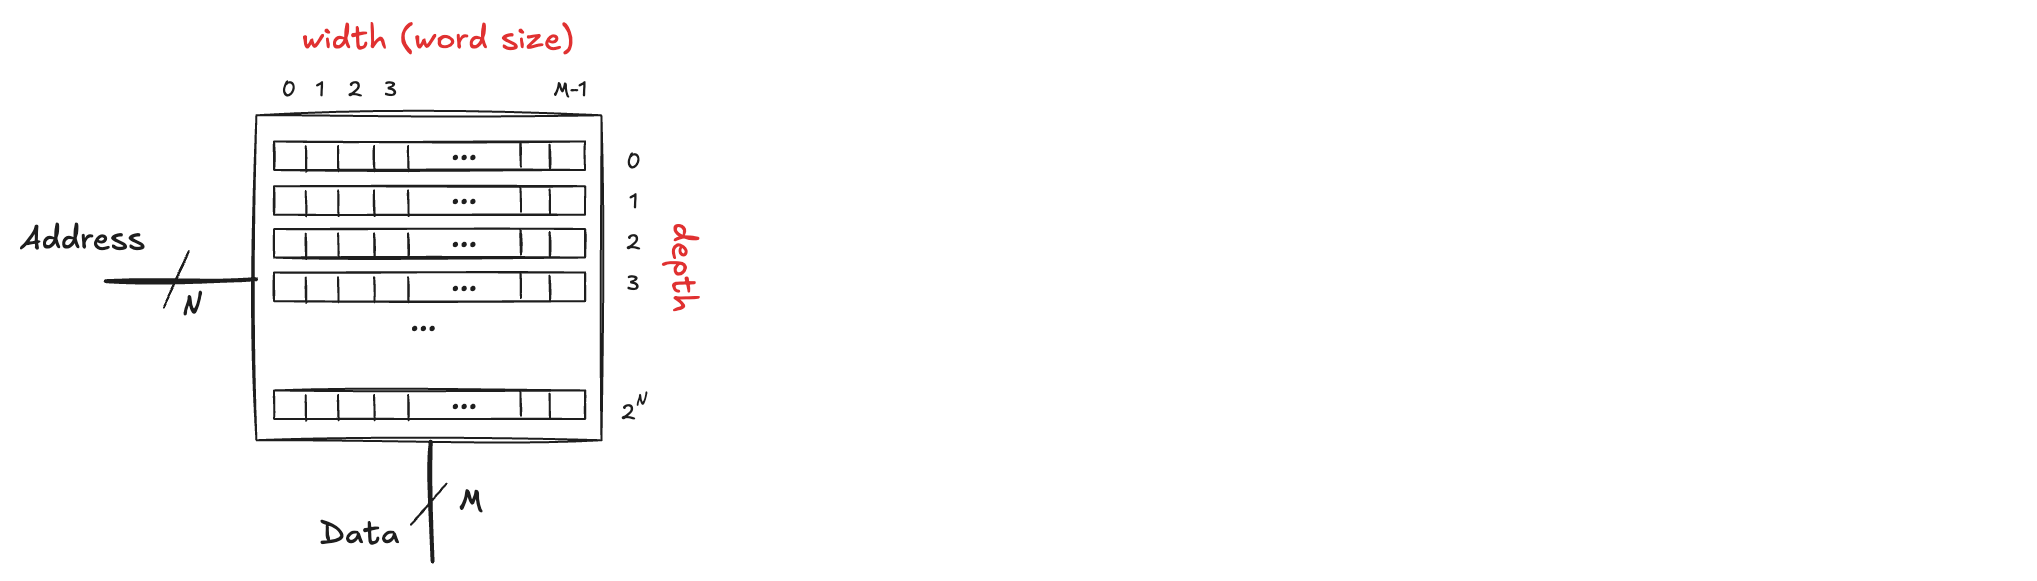

If the memory uses an N-bit address, then it contains 2^N rows, because N bits can uniquely encode that many distinct positions. If each row holds M bits of data, the memory is M columns wide. The total size of the memory is therefore the product of its depth and its width: (2^{N} \times M) bits

$\displaystyle 2^{N} \, M$ bits


To make these ideas concrete, imagine a memory with a 2-bit address and 3-bit data: 

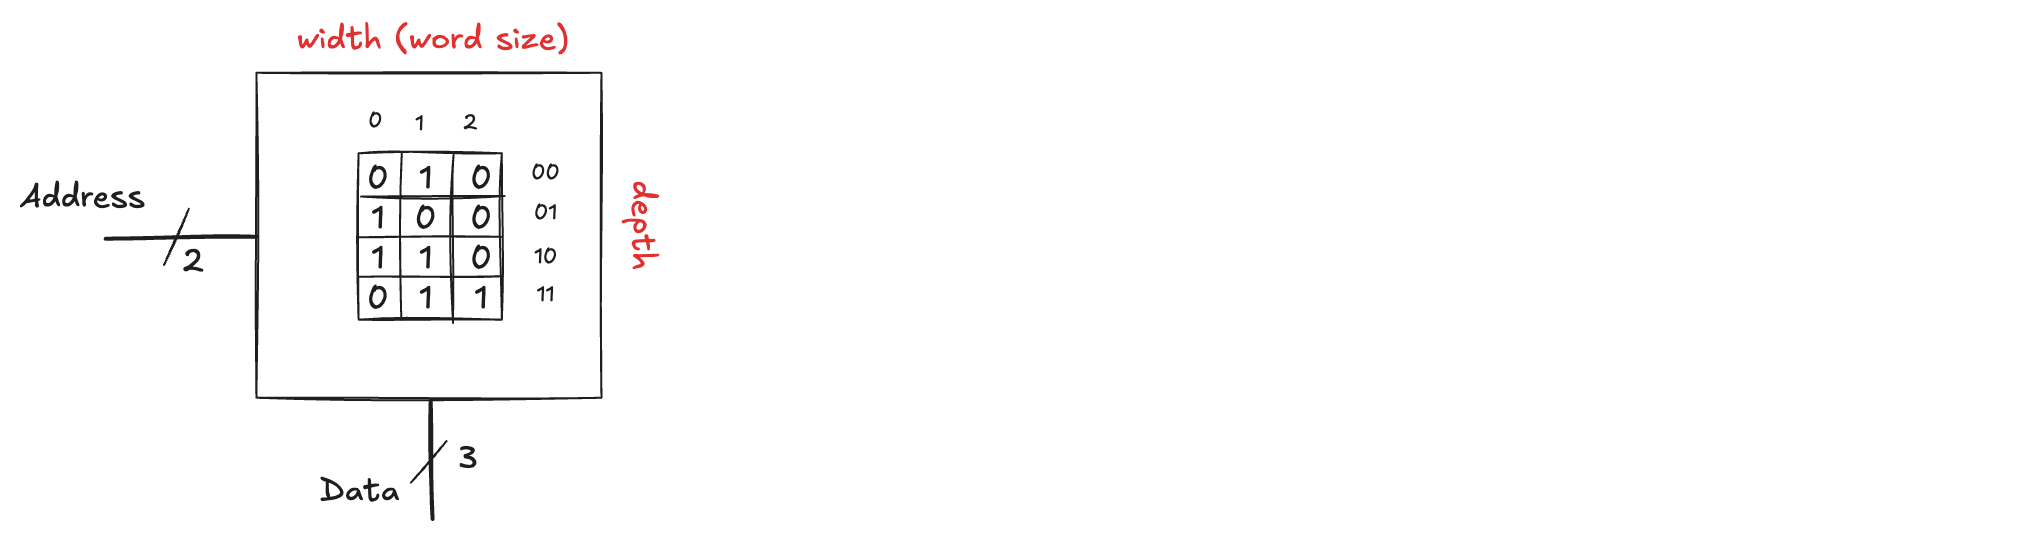

Because the address is 2 bits wide, it can specify exactly four rows. Each of these rows stores a 3-bit data word. Thus, this device is a 4-by-3 memory array: four words of memory, each three bits wide. When an address such as 01 or 10 is presented, the memory selects the corresponding row and either outputs the 3-bit word stored there or writes new data into that location.

This simple model of rows and columns provides the foundation for all forms of memory, whether tiny register files inside a processor or massive RAM modules used in modern computers. Regardless of scale, the conceptual structure remains the same: memory stores words at discrete addresses, and each access selects one row and retrieves or updates the bits contained in that word.

### Bit Cell

At the lowest level, every memory array is composed of **tiny storage elements** called **bit cells**. Each bit cell stores exactly one bit of information, and millions or billions of these cells are arranged in a regular grid to form modern memory chips. Although different memory technologies use different circuit designs for the bit cell, they all share the same architectural idea: each cell must be individually **selectable**, **readable**, and **writable**.

To make this possible, every bit cell is connected to two special control lines: a **wordline** and a **bitline**:

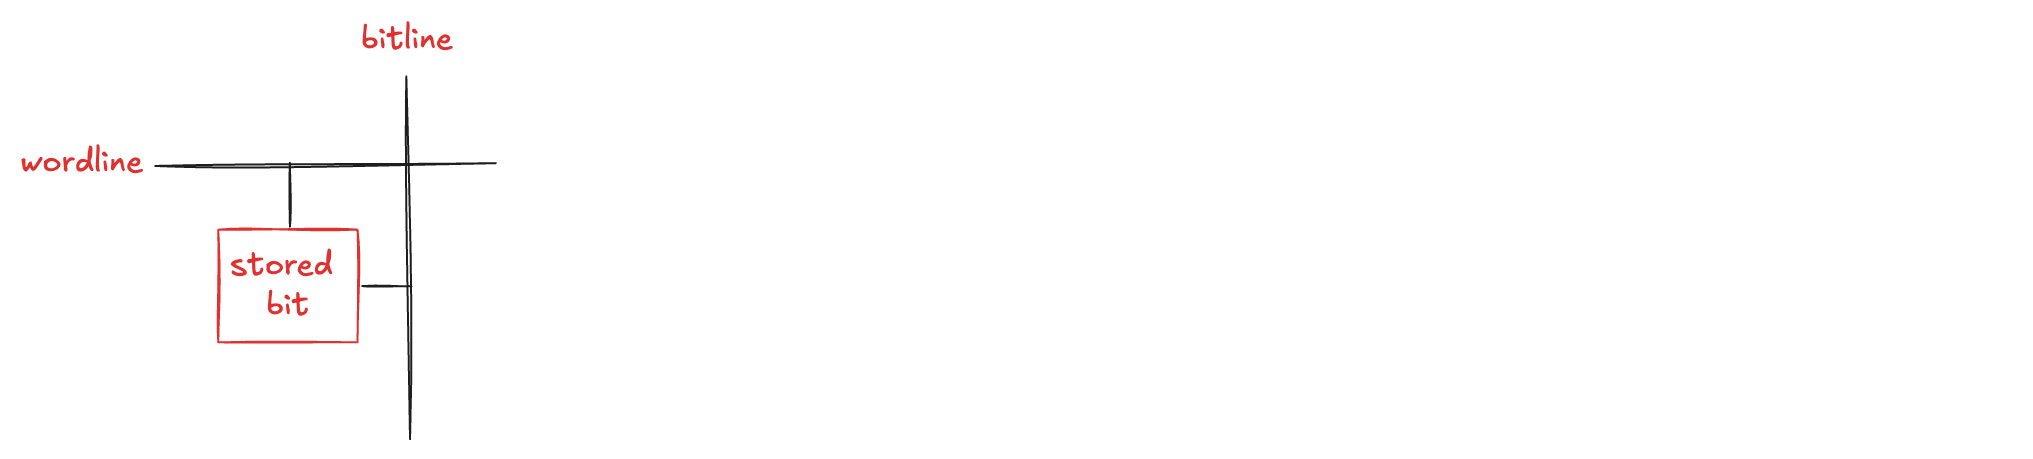

The wordline runs horizontally across a row of cells, while the bitline runs vertically down a column. **The memory’s address decoder activates exactly one wordline** at a time based on the incoming address. When a particular wordline is asserted, it effectively opens a small switch inside each bit cell of that row, **connecting the internal storage element to the corresponding bitline**. If the wordline is not active, the bit cell remains electrically isolated; its stored value is preserved, but it cannot interact with the outside circuitry. The exact mechanism used to store the bit depends on the **memory technology**. 

**Reading** the content of a bit cell begins with preparing the bitline in a neutral state, it is left floating or precharged so that it does not impose a value onto the cell. When the wordline is then activated, the tiny internal storage element of the bit cell influences the bitline, either pulling it slightly toward a logical 1 or allowing it to fall toward a logical 0. Sense amplifiers connected to the bitline detect this small change and convert it into a clean, full-swing digital signal representing the stored bit.

**Writing** to a bit cell reverses the roles. Before activating the wordline, the memory controller drives the bitline to the value that must be written, either a strong 0 or a strong 1. Once the wordline turns on, this driven bitline overwhelms whatever value was previously stored inside the bit cell. The cell’s storage circuit is forced into the new state, and when the wordline is turned off again, the new bit remains stored inside the cell.

This interplay between the wordline selecting the row and the bitline carrying the data enables the memory array to read and write individual bits efficiently while scaling to extremely large storage capacities.

Individual bit cells come together to form a complete memory array: 

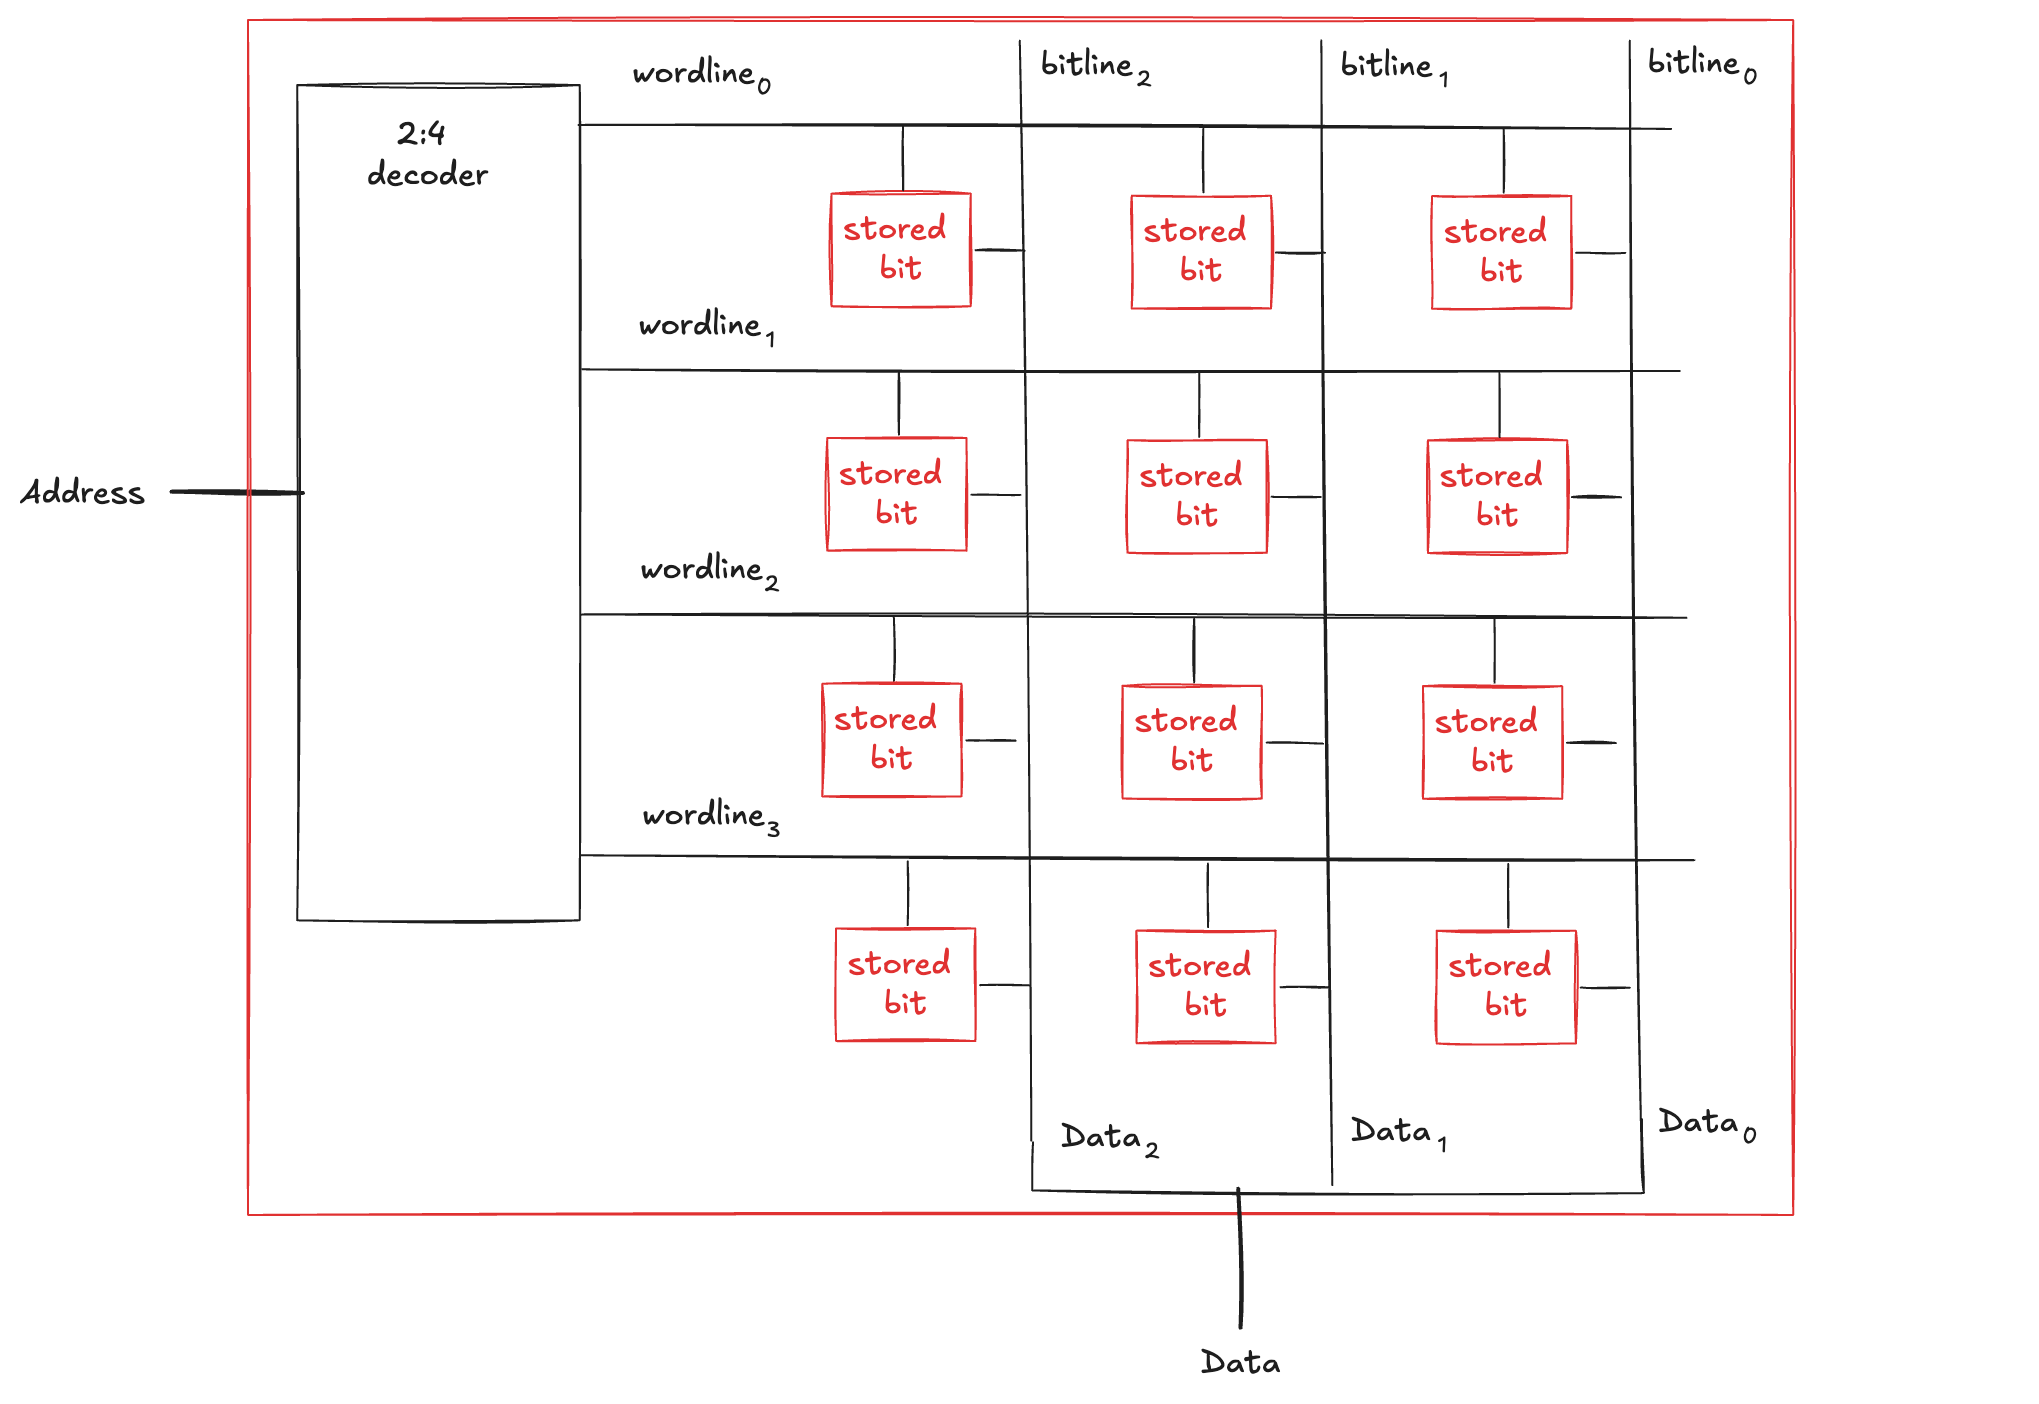

The address enters a decoder, which activates exactly one of the wordlines. All bit cells along that selected row become connected to their respective bitlines, while the cells in the remaining rows stay isolated. Each column corresponds to a bitline that carries the data to or from the bit cells. When a wordline is activated, the bit cells in that row interact with their bitlines. If the memory is being read, the stored bits in that row drive the bitlines, producing a data word at the output. If the memory is being written, the bitlines are driven with the new value, and activating the wordline forces the selected bit cells to store those values.

This layout helps visualize how the array implements the logical view of memory: selecting one row with the address corresponds physically to asserting exactly one wordline, and the parallel data word corresponds to the bitlines connected to the chosen row.

### Dynamic Random Access Memory (DRAM)

Dynamic RAM, or DRAM, stores each bit of information using a **tiny capacitor**. This capacitor holds electrical charge, and a single transistor acts as a switch that either connects the capacitor to the bitline or isolates it from the rest of the circuit:

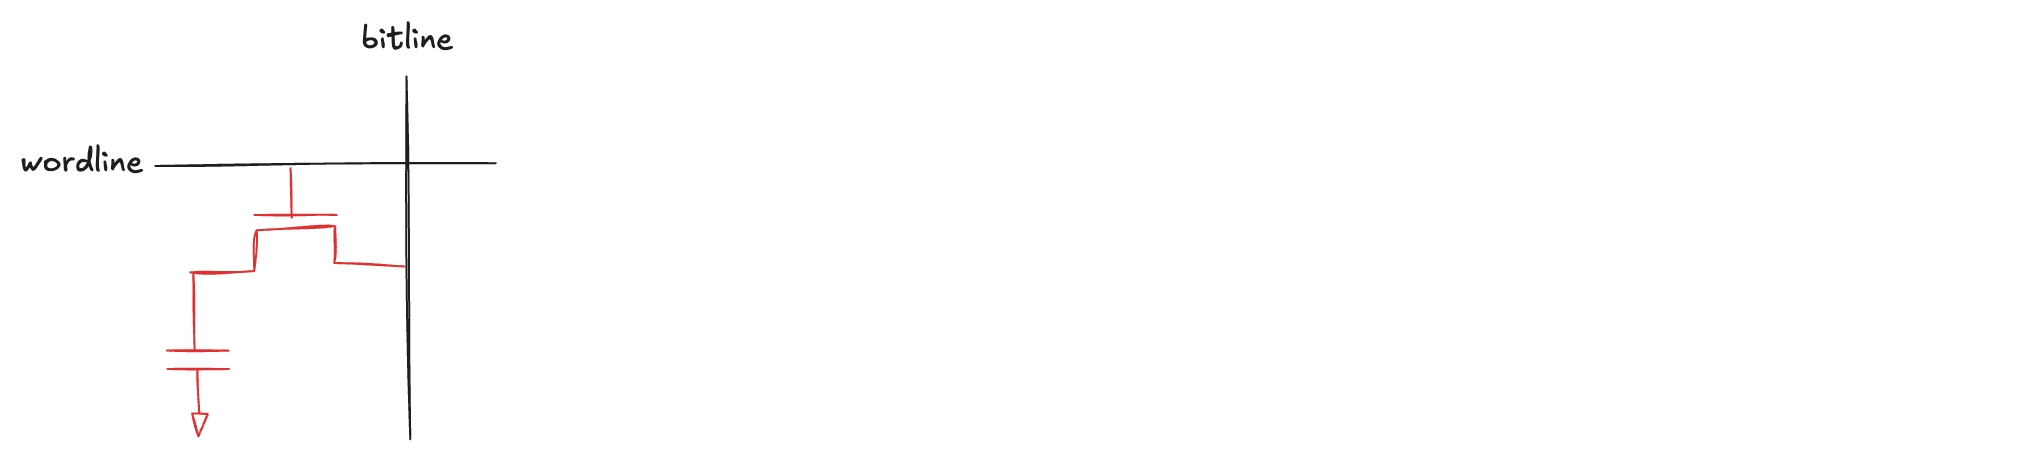

When the capacitor is charged up to the supply voltage, the memory cell represents a logical 1; when it is discharged to ground, it represents a logical 0. This extremely compact structure (just one transistor and one capacitor per bit) makes DRAM the most space-efficient memory technology available. As a result, DRAM can store vastly larger amounts of data in the same silicon area, which explains why it is used for main memory in virtually all computers.

Writing a value into a DRAM cell is straightforward. The memory controller first drives the bitline to the desired value. Then it activates the appropriate wordline, turning on the access transistor. The capacitor becomes connected to the bitline, and the strong driver forces the charge on the capacitor to match the bitline level. When the wordline is de-asserted, the transistor turns off and the capacitor is left holding the stored charge.

Reading from a DRAM cell is more subtle because the stored charge is extremely small. Before a read operation, the bitline is precharged to a neutral midpoint. When the wordline is activated, the tiny charge on the capacitor slightly perturbs this bitline voltage. A sensitive amplifier detects the small deviation and amplifies it into a clean digital 0 or 1. However, **the act of reading removes charge from the capacitor**, disturbing the very bit that is being read. In other words, reading a DRAM cell **destroys** its stored value, so **the memory must immediately rewrite** the bit to restore the charge after every read. This is known as the "read-and-restore" process.

Even if the memory is not being accessed, the charge on the capacitors **gradually leaks away** due to tiny imperfections in the transistors and dielectric materials. For that reason, DRAM requires **refreshing**: every cell must be periodically read and rewritten to prevent data loss. Refresh cycles typically occur every few milliseconds, managed automatically by the DRAM controller. This periodic maintenance is what makes DRAM "dynamic": the data must be actively maintained over time!


The modern DRAM cell can be traced back to the invention of Robert Dennard at IBM in 1966. 

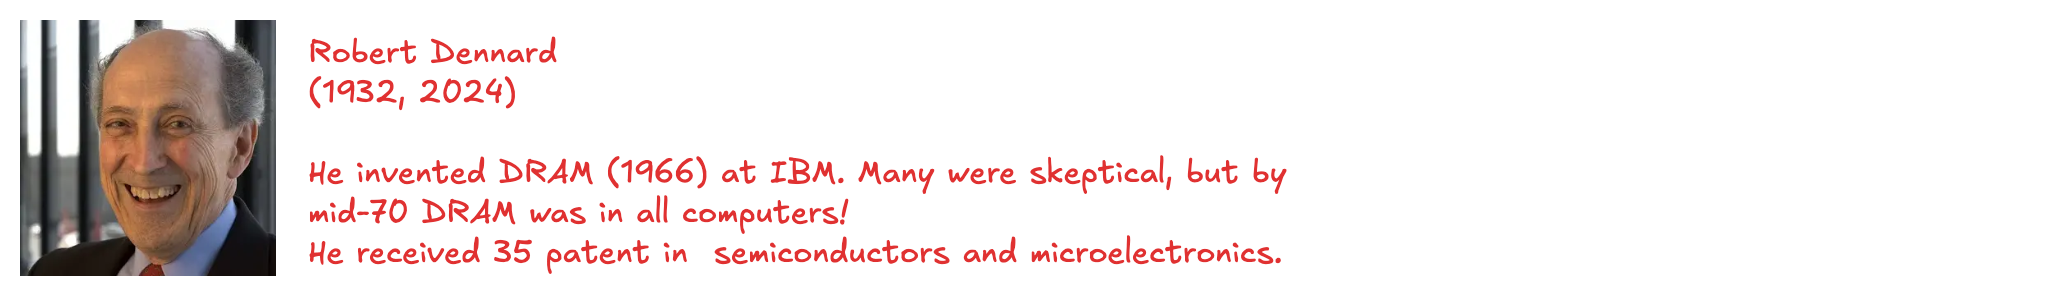

Although initially met with skepticism, Dennard’s concept proved transformative. By the mid-1970s, DRAM had become the dominant memory technology in computers.

### Static Random Access Memory (SRAM)

Static RAM, or SRAM, stores each bit using a pair of cross-coupled inverters, essentially a **tiny bistable circuit** that can hold its state indefinitely as long as power is supplied. 

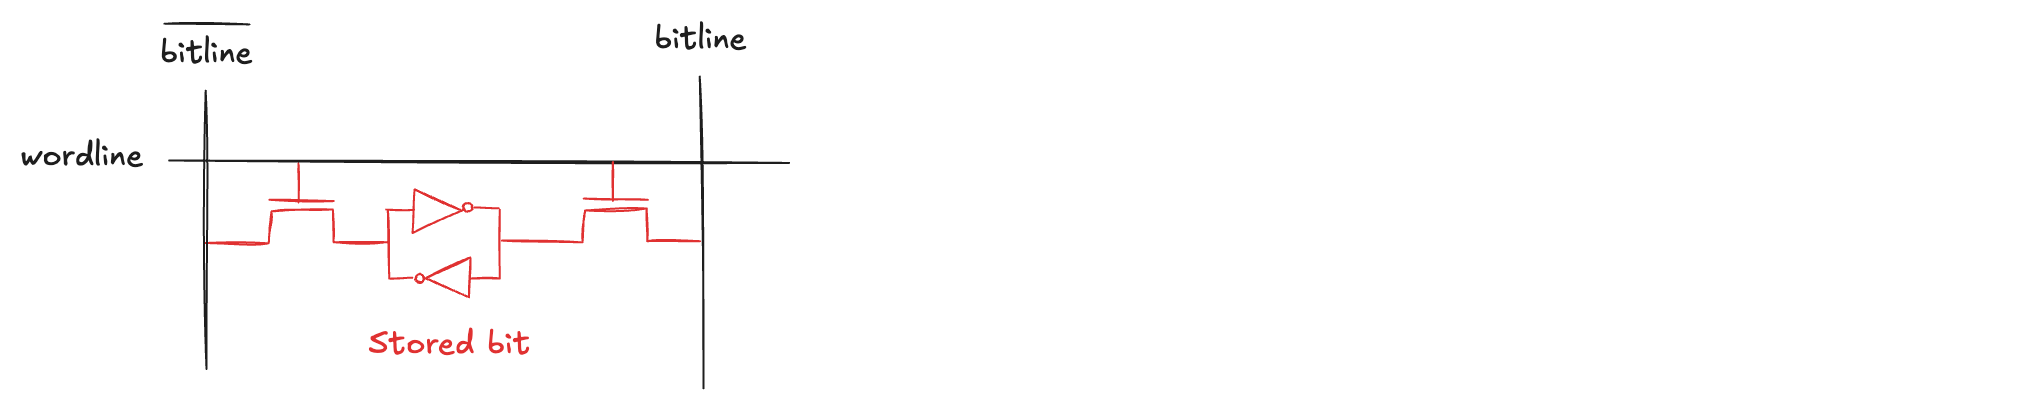

This bistable structure has two stable configurations: one corresponding to a logical 0 and the other to a logical 1. Because the inverters continuously reinforce each other, the stored bit does not leak away or degrade over time, which means that SRAM **does not require periodic refresh cycles** like DRAM.

To interact with the stored value, each SRAM bit cell uses two access transistors controlled by a wordline. When the wordline is inactive, the cross-coupled inverters are isolated from the outside world, maintaining their internal state without disturbance. When the wordline is asserted, both access transistors turn on, connecting the internal storage node to a pair of complementary bitlines. These bitlines carry both the value and its inverse, which improves noise immunity and allows fast, reliable sensing during read operations.

Reading from an SRAM cell involves letting the stored bit influence the bitlines. Before the read, the bitlines are usually precharged to an intermediate level. When the wordline activates the access transistors, the stronger of the two inverter states pulls one bitline slightly down while the opposite node pushes the complementary bitline slightly up. A sense amplifier detects this differential change and amplifies it into a clean digital result. The important point is that this read operation does not disturb the stored data, the inverters are strong enough to preserve the original value even while driving the bitlines.

Writing, on the other hand, requires overpowering the existing state of the cell. To accomplish this, the memory controller drives the bitlines with the new value and its complement. When the wordline is asserted, these externally driven voltages override the inverters long enough to flip the cell into the new state. Once the wordline is lowered again, the cross-coupled inverters resume reinforcing the updated bit value.

Because SRAM cells maintain their state without needing refresh and can be **accessed very quickly**, they are ideal for caches, register files, and other high-speed memory structures. However, the drawback is that an SRAM cell requires **significantly more transistors** than a DRAM cell (typically six instead of one) which makes it more expensive in terms of silicon area. As a result, SRAM is used sparingly where speed is critical, while DRAM is used for larger, slower main memory.

### Register Files

A register file is **a small, fast storage structure** composed of a **set of registers** used to hold temporary values during computation. Unlike main memory, which is large but relatively slow, register files are designed for **rapid access** and are therefore placed very close to the processing core. The values stored here typically represent intermediate results, loop counters, addresses, operands, and other short-lived data items that the CPU needs to access frequently.

Rather than being built from individual flip-flops, register files are usually implemented as **compact, multi-ported SRAM arrays**. This approach is far more space-efficient, since SRAM cells require fewer transistors per bit than flip-flops. The term "multi-ported" means that the register file supports multiple simultaneous accesses. A processor often needs to read two operands and write back a result in every clock cycle, so the register file must be able to handle several independent addresses at the same time without conflicts.

Consider a common example: a register file containing 32 registers, each 32 bits wide. 

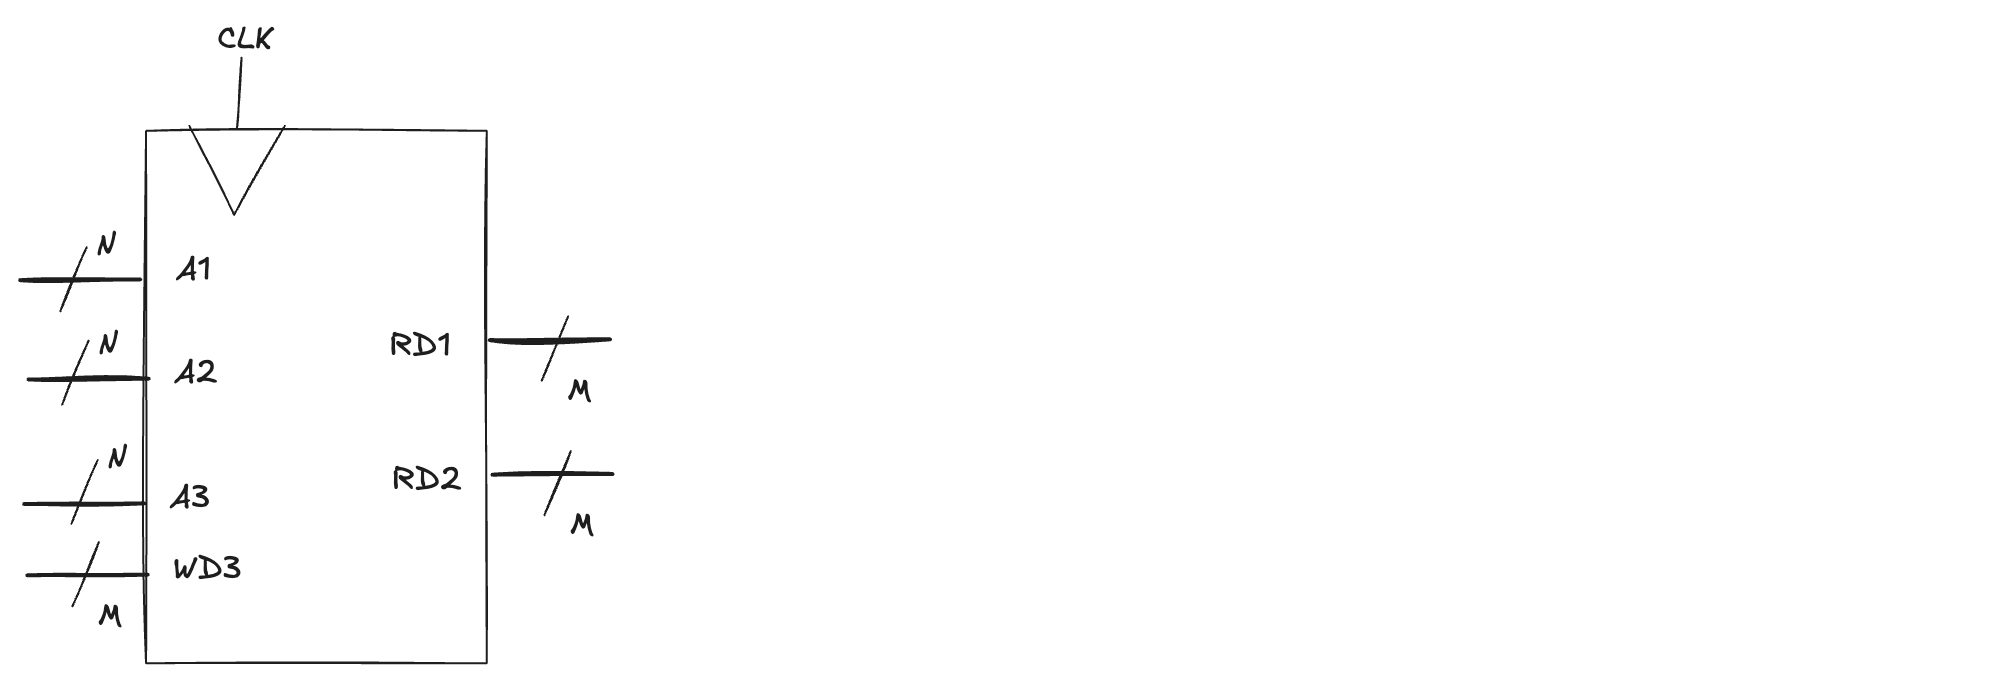

Because the file holds 32 entries, the address size is 5 bits. A typical three-ported design includes two read ports and one write port. The addresses A1 and A2 select the two registers to be read, producing the read data RD1 and RD2. Meanwhile, A3 selects the register to be written, and WD3 provides the data to store. With this organization, the register file can deliver two operands and accept one result within the same cycle, which matches the requirements of many instruction set architectures.

In some designs, one register is **assigned a special purpose**: it is hardwired to always return zero when read. This is useful because zero is one of the most frequently used constants in programs. Hardwiring a dedicated zero register avoids the need to store or compute zero explicitly, simplifying certain instructions and saving both time and hardware resources.

Overall, register files play a crucial role in processor performance. By combining fast access, controlled size, and multiple ports, they provide the high-speed data stream required to keep the execution units busy every cycle.


### Volative memories comparison

Although flip-flops, SRAM, and DRAM are all forms of volatile memory (they lose their contents when power is removed) they differ dramatically in how much hardware they require and how quickly they can respond. A simple comparison highlights these differences: 

| Memory Type | Transistors per Bit Cell | Latency |
|-------------|---------------------------|---------|
| Flip-Flop   | 20                        | Fast    |
| SRAM        | 6                         | Medium  |
| DRAM        | 1                         | Slow    |

**Flip-flops** are the **fastest option**. Because they are built from robust logical elements, the stored value is immediately available at the output without waiting for any sensing or amplification. However, this speed comes at the price of **significant silicon area**, which makes flip-flops practical only for **tiny memories** such as pipeline registers or control-state storage inside a processor.

**SRAM** sits in the middle ground. It is **not as fast as a flip-flop**, because reading or writing requires the access transistors and bitlines to interact with the cross-coupled inverters. Still, SRAM provides **excellent performance** with much lower area cost, making it the natural choice for **caches and register files** where both speed and capacity matter.

**DRAM** is **slower** still. Because the stored charge in a capacitor is tiny, reading a DRAM cell involves waiting for that charge to influence the bitline slightly before a sense amplifier can detect it. Writing also requires time for the bitline driver to charge or discharge the capacitor. On top of this, DRAM must periodically refresh its contents so that the stored charge does not leak away. These refresh cycles add overhead and contribute to latency. Despite this, DRAM’s **incredibly compact cell structure** makes it ideal for **very large memories** such as the main memory of computers.

Modern DRAM technologies have evolved significantly. Synchronous DRAM, and especially double-data-rate (DDR) variants, use both rising and falling edges of the clock to transfer data, effectively doubling throughput. The first DDR standard appeared around the year 2000 with effective data rates near 100 MHz. Today, DDR5 achieves multi-gigahertz transfer rates (exceeding 5 GHz) thanks to sophisticated signaling and parallelism. DDR6 technology is already in development and announced for 2027, promising even higher speeds and efficiency improvements.

Choosing the right memory technology for a particular system **depends on the requirements** of that design. If maximum speed is critical, flip-flops or SRAM may be the best option. If large capacity is needed and slower access is acceptable, DRAM is the natural choice. **Designers must always balance speed, cost, power consumption, and area** to select the most appropriate memory structure for their application.


### Read Only Memory (ROM)

Read Only Memory, or ROM, is one of the simplest forms of digital storage. Unlike RAM, which repeatedly rewrites or refreshes its contents, a ROM stores information permanently using the physical structure of the circuit. Each bit in a ROM cell is defined by **whether a particular transistor is present or absent in the layout**. This structural encoding makes ROM inherently non-volatile, its data persists even when power is removed.

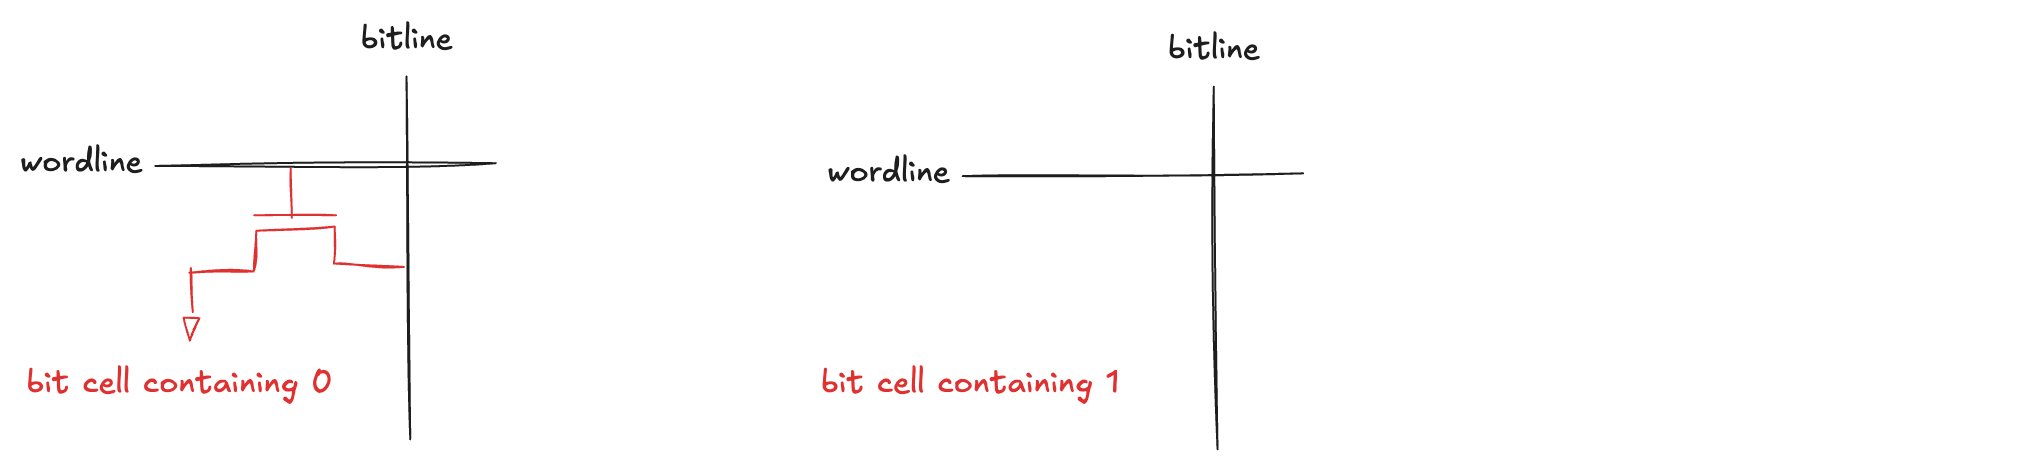

Reading a ROM cell relies on very simple behavior. Each bitline is initially weakly pulled high, meaning it sits at a logical 1 unless something actively pulls it down. When a read occurs, the memory activates one wordline corresponding to the selected row. Turning on this wordline connects the bit cell to the bitline, but only if a transistor is actually present at the crossing point. If the transistor exists, it forms a conducting path to ground and pulls the bitline low, producing a logical 0. If the transistor is absent, no conduction occurs; the bitline stays high, and the read value is interpreted as a logical 1. Thus, the physical presence of the device encodes a 0, while its absence encodes a 1.

Because ROM bits are **fixed during fabrication**, the pattern of transistors in the array fully defines its contents. Designers often describe the programmed values using **dot notation***, where a dot represents the presence of a transistor at the intersection of a wordline and a bitline. 

![image.png](attachment:image-seq-bb-19.png)

The visual grid of dots provides a direct representation of how the ROM is wired internally. This direct physical encoding makes ROM extremely compact and reliable, and it is **widely used for storing constants, lookup tables, microcode, and any data that must remain unchanged over the lifetime of a system**.
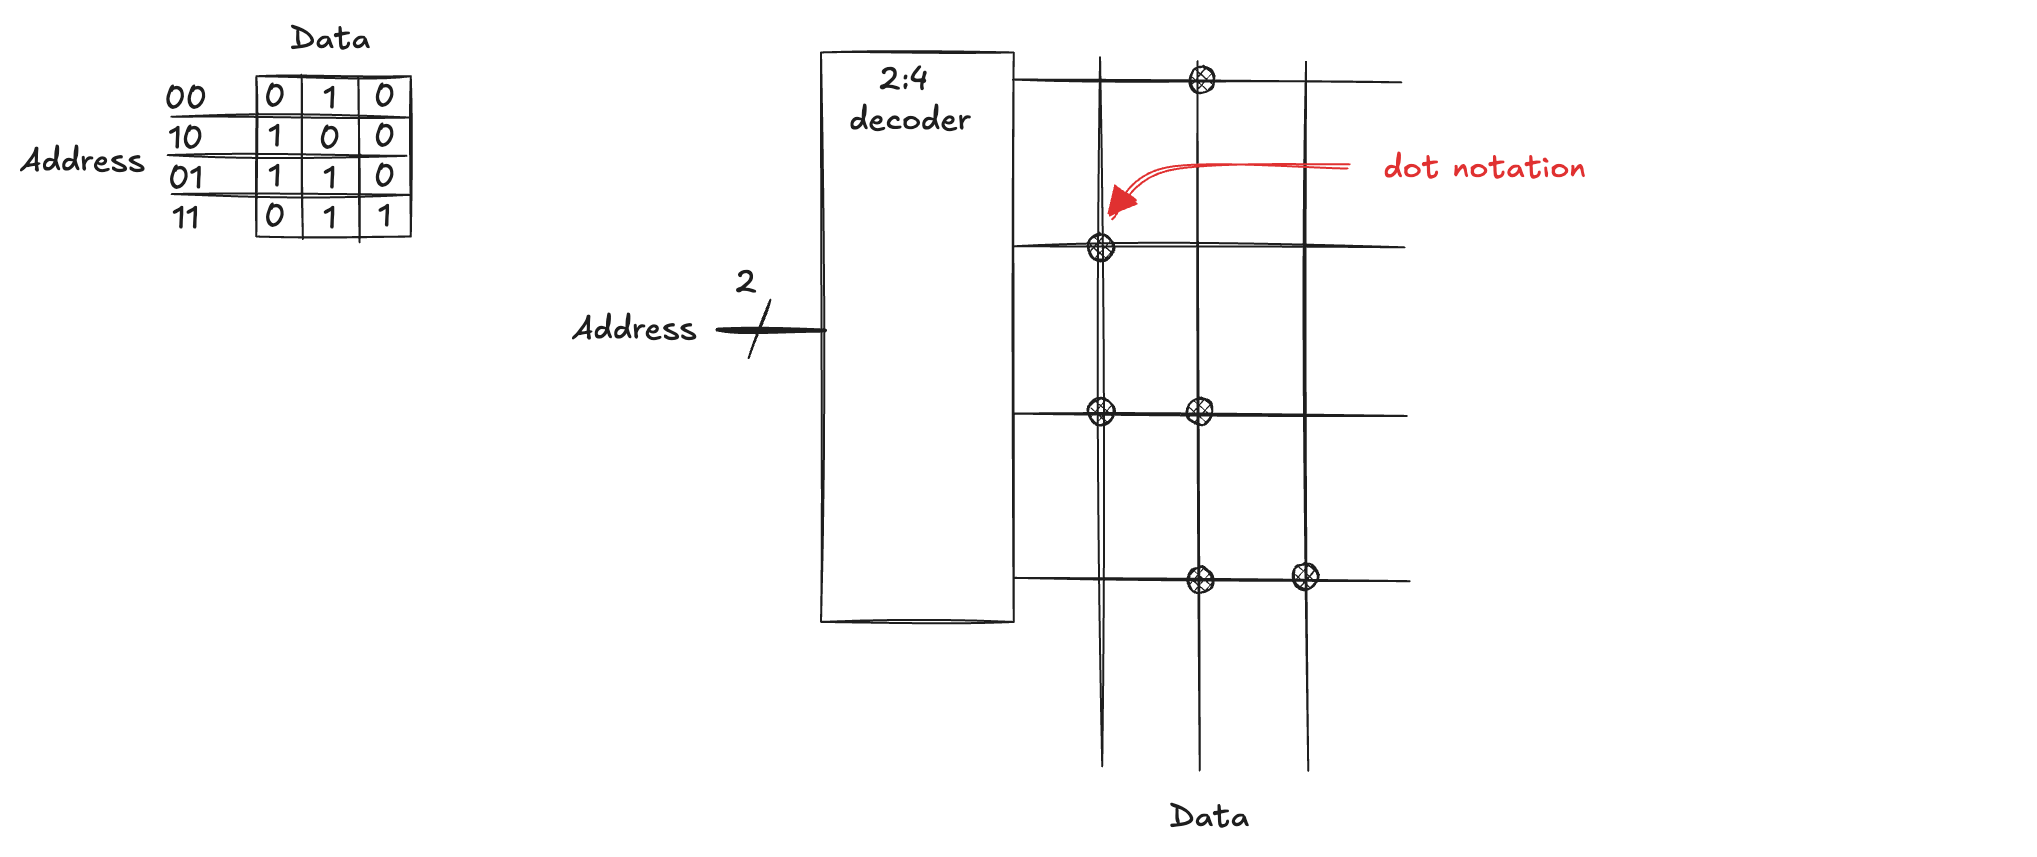

### Programmable ROM

A programmable ROM, or PROM, is a refinement of the simple mask-programmed ROM. Instead of deciding during fabrication whether a transistor is present or absent in each bit cell, a PROM includes a transistor in every location by default. What makes a bit a logical 0 or 1 is no longer the presence of the device, but whether that transistor is electrically connected to ground. The key idea is to give the user a way to **permanently connect or disconnect this path after manufacturing**.

Programming a PROM involves applying a high voltage to specific locations in order to **"blow" tiny fuses**. When a fuse is intact, the transistor in that bit cell remains connected to ground. 

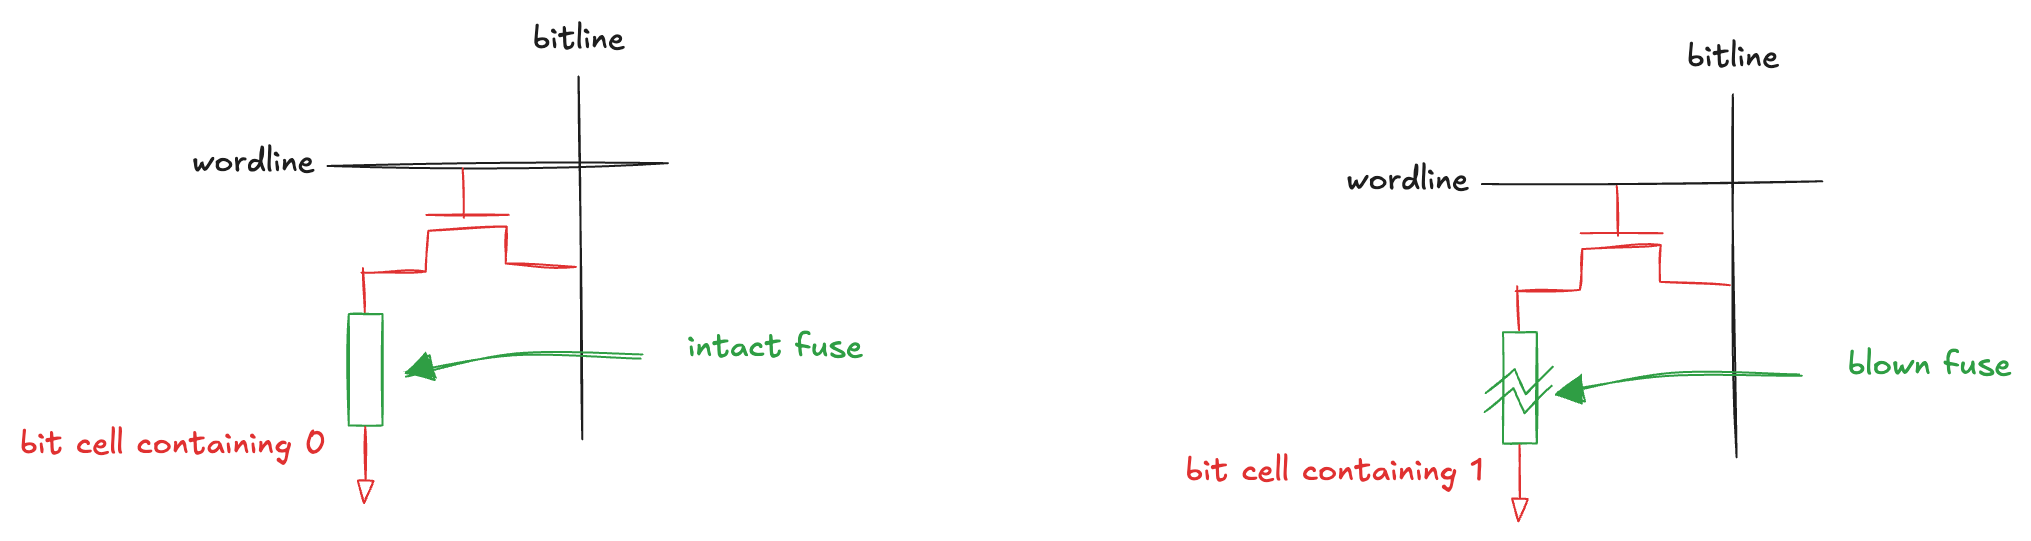

During a read, activating the wordline allows this transistor to pull the bitline low, representing a stored 0. If the fuse is blown, the connection to ground is physically broken, leaving the transistor isolated. With no discharge path, the bitline remains high when the wordline is enabled, and the cell therefore represents a 1. In this way, destroying a fuse encodes a permanent logical 1.

Because each fuse can be blown only once, a traditional PROM is a **one-time programmable device**. Once a cell has been programmed, its contents cannot be changed or repaired. This irreversible step is often described as "burning" the ROM, a name that reflects both the physical destruction of the fuse and the permanence of the resulting data pattern. PROMs are well suited for **storing configuration data, firmware, or lookup tables that must never change after deployment**.

### Reprogrammable ROM

Classic PROMs rely on irreversible fuses, later technologies introduced **reversible mechanisms** that allow connections to be made or broken multiple times. These reprogrammable devices (such as EPROM, EEPROM, and flash memory) extend the core idea of PROM by providing a way to modify stored data without replacing the chip, while preserving the compact layout and simple read mechanism of ROM-based structures.

While traditional PROMs can be written only once, later technologies introduced mechanisms that allow ROM contents to be **erased and rewritten**. The first major step was the development of **EPROMs**, or Erasable Programmable Read-Only Memories. Instead of using a fuse to store a bit, an EPROM relies on a special type of transistor called a floating-gate transistor. This device has an extra gate that is electrically isolated by an insulator, meaning it is not physically connected to any other wires in the circuit. Electrons can be placed onto or removed from this floating gate, and their presence or absence determines whether the transistor conducts.

To program an EPROM, a high voltage is applied so that electrons tunnel through the insulator and become trapped on the floating gate. When enough charge accumulates, the transistor switches on, allowing the bitline to be pulled toward the selected wordline during a read—representing a programmed state. Erasing an EPROM requires exposing the chip to intense ultraviolet light for an extended period, often around thirty minutes. The high-energy photons dislodge the trapped electrons, emptying the floating gate and turning the transistor off again. Because these two operations (injecting charge and removing it) change the stored value, they are referred to as programming and erasing. This mechanism made EPROMs reusable, but the need for UV exposure also made the process slow and inconvenient.

The next evolution was EEPROMs, Electrically Erasable PROMs, and eventually **Flash memory**. These devices use the same underlying principle of floating-gate transistors but add circuitry that allows both programming and erasing to occur electrically, without any need for UV light. This capability made reprogramming far more practical, enabling updates to be made directly within a system. Flash memory, in particular, became extremely widespread because it provides high density, low cost, and good durability. By 2024, Flash memory could be purchased for only a few cents per gigabyte, making it the dominant storage technology in portable devices, solid-state drives, embedded systems, and countless consumer electronics.

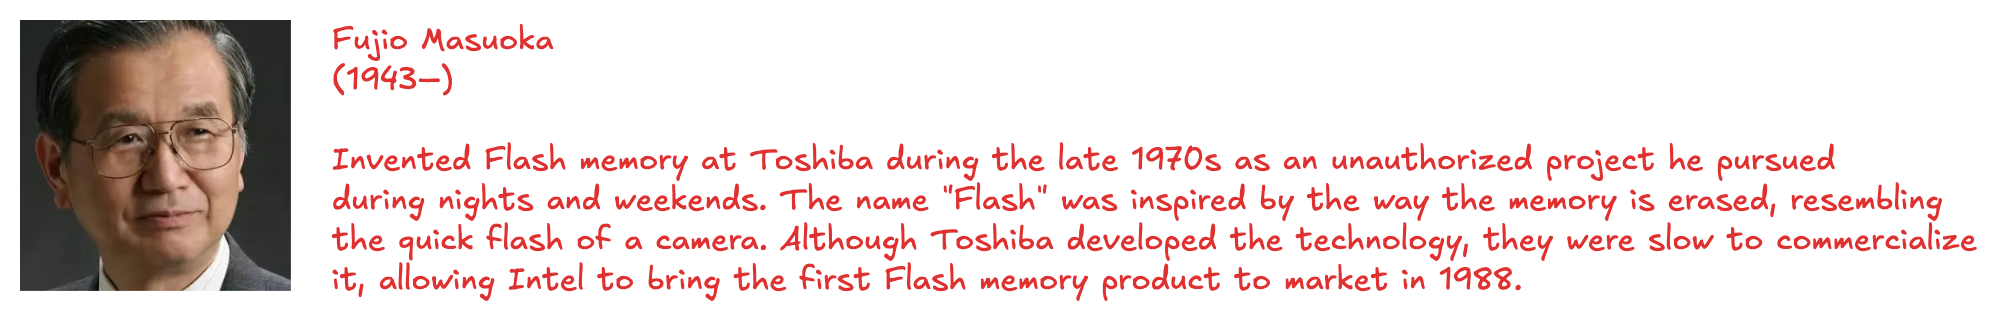

Although the term "Read-Only Memory” suggests a technology that cannot be changed, modern ROM variants clearly blur that boundary. What truly differentiates ROM from RAM is not the ability to write but the nature of how writing occurs. ROM-based technologies take considerably longer to program or erase, but they retain their contents without power. This non-volatility is what makes them essential for storing firmware, configuration data, and any information that must persist reliably from one power cycle to the next.

## Programmable Hardware

Programmable hardware allows digital systems to implement new logic functions simply by **changing configuration** data rather than **altering the physical circuit**. By storing patterns that describe a desired function, devices such as Lookup Tables, Programmable Logic Arrays, and Field-Programmable Gate Arrays can adapt their behavior to a wide range of applications, offering the flexibility of software combined with the performance of dedicated hardware.

### Lookup Tables (LUT)

Although we usually think of memories as devices for storing data, a memory array can just as easily be used to i**mplement combinational logic**. The key observation is that **a truth table is itself a small memory**: each combination of input variables corresponds to a particular row, and each row contains the output values that the logic function should produce. If we treat the **inputs of the logic function as the address lines of a memory**, and **we store the desired output bits** as the data stored in that memory, then **reading the memory is equivalent to evaluating the logic function**. A memory with 2^N words and M bits per word can therefore implement any combinational function with N inputs and M outputs. The decoder chooses one of the 2^N rows based on the input pattern, and the bits stored in that row become the output of the function. This arrangement is known as a **lookup table**, or LUT, because the memory "looks up" the output value associated with the given input. To make this idea concrete, consider a simple example with two inputs, A and B, and one output Y. The function we want to implement is Y=AB (a logical AND):

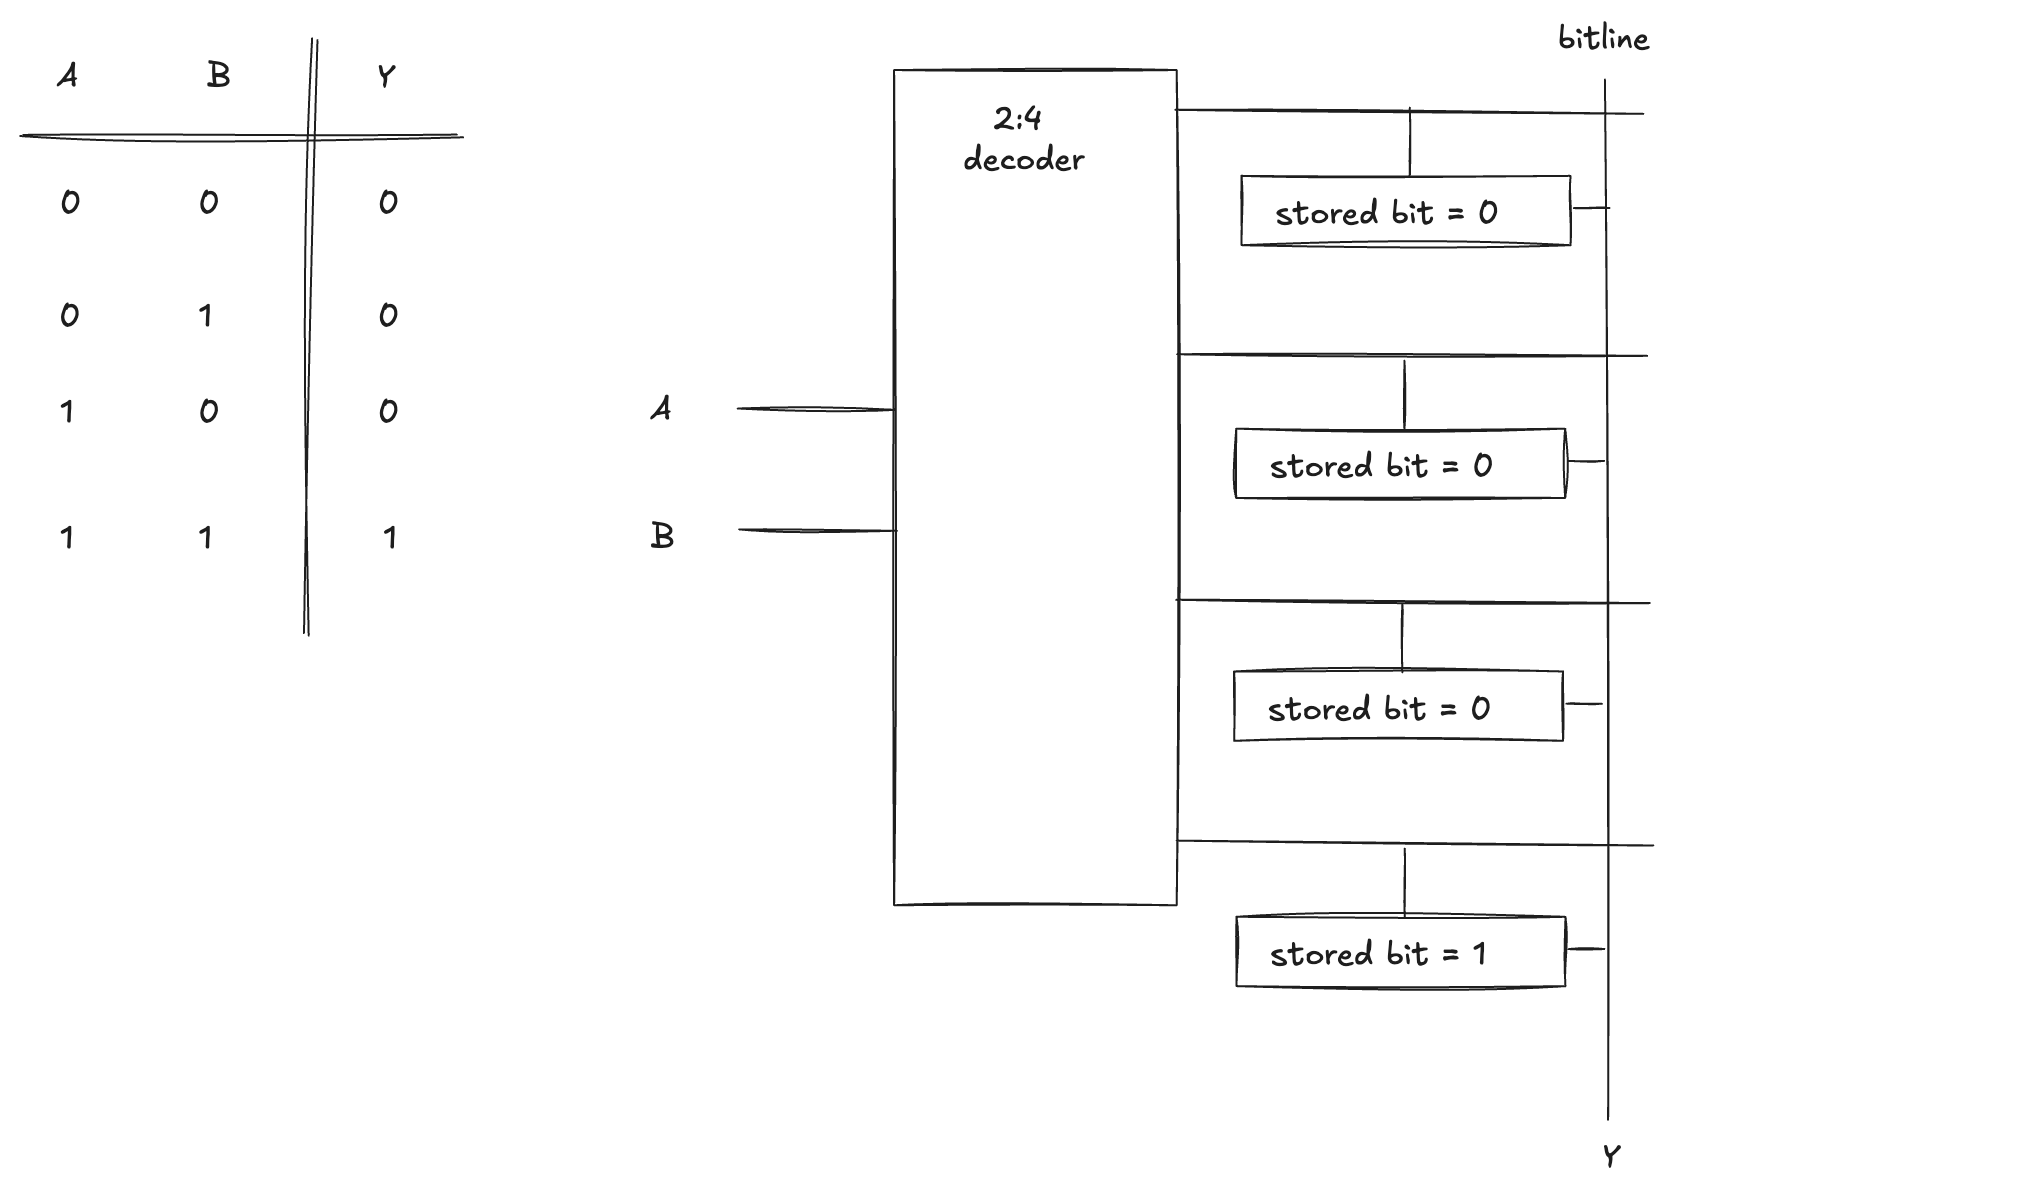

This technique generalizes to more complex functions and larger numbers of inputs and outputs. **Rather than wiring together many logic gates, designers can simply program the memory contents**. For this reason, LUTs are the **fundamental building blocks of FPGAs**, where each configurable logic block contains a small memory array used to implement arbitrary logic functions specified by the user.

### Programmable Logic Array (PLA)

A Programmable Logic Array, or PLA, is built on the idea that logic gates can be arranged in regular, grid-like structures, much like memory cells. If the connections inside these grids are made programmable, the array can be configured after fabrication to implement a wide range of logic functions. This approach provides a structured alternative to wiring individual gates by hand, while still allowing considerable flexibility.

PLAs are designed specifically to implement **two-level combinational logic** in the classic sum-of-products form. The circuit begins with the set of input signals, provided both in their true and complemented versions. These signals feed into a programmable array of AND gates. By choosing which connections are present and which are absent, the AND array generates a collection of product terms—also known as implicants—that correspond to the logical conditions relevant to the function being implemented. The outputs of the AND array then flow into a second programmable array made of OR gates. Here, each output is formed by selecting which implicants to combine. Because the AND array can generate any desired set of minterms or simplified implicants, and the OR array can combine them in any pattern, the PLA can realize any two-level combinational logic function. 

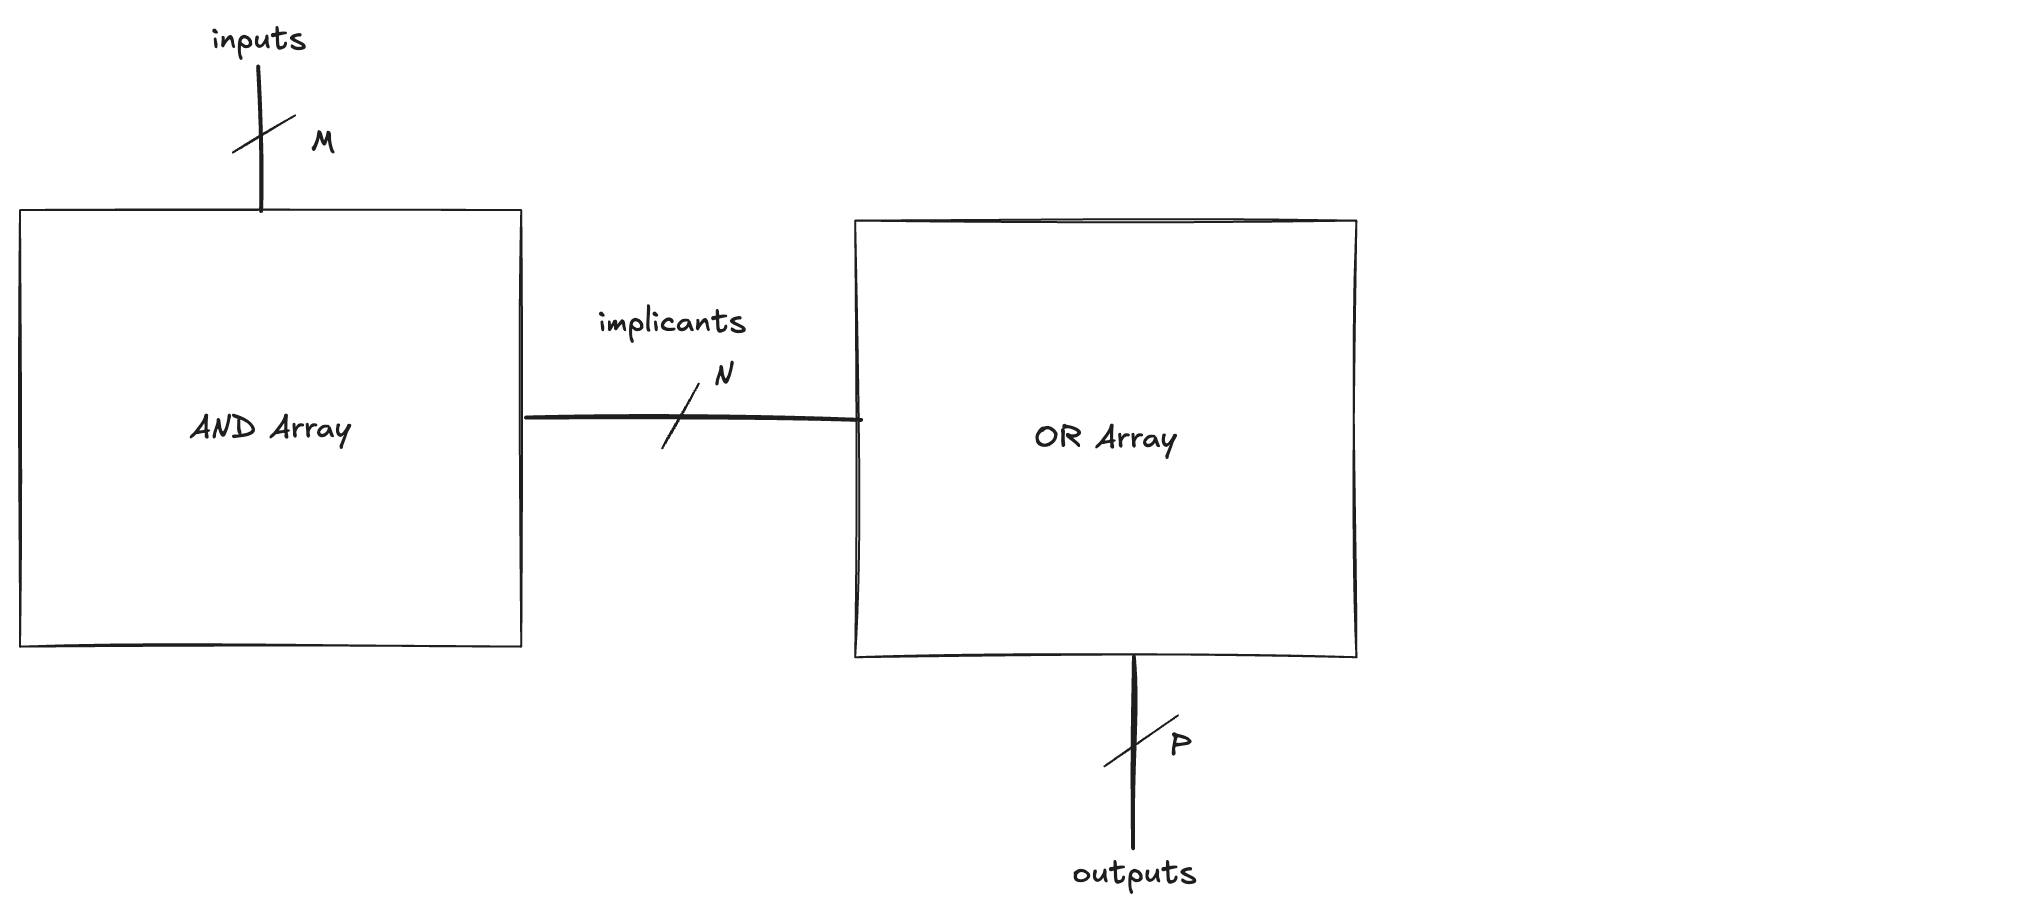

This organization offers a powerful and compact way to implement logic functions that would otherwise require many separate gates and hand-designed interconnections. It also highlights a recurring theme in digital design: by organizing components into predictable arrays and making connections programmable, complex behavior can be achieved through configuration rather than detailed custom wiring.

A PLA can be understood most clearly through a concrete example. Suppose we want to implement two output functions of three inputs, such as

$\displaystyle X = \overline{A}\,\overline{B}\,C + A\,B\,\overline{C}$

and

$\displaystyle Y = A\,\overline{B}$

These expressions illustrate the essence of a PLA: each function is written in sum-of-products form, and each product term is generated by the programmable AND array. The inputs, provided in both true and complemented form, feed rows of potential connections. Wherever a connection is present, that input contributes to a particular implicant. Each implicant then becomes an input to the OR array, which selects which product terms participate in producing each output. By programming these two planes of connections, the PLA generates exactly the logic required:

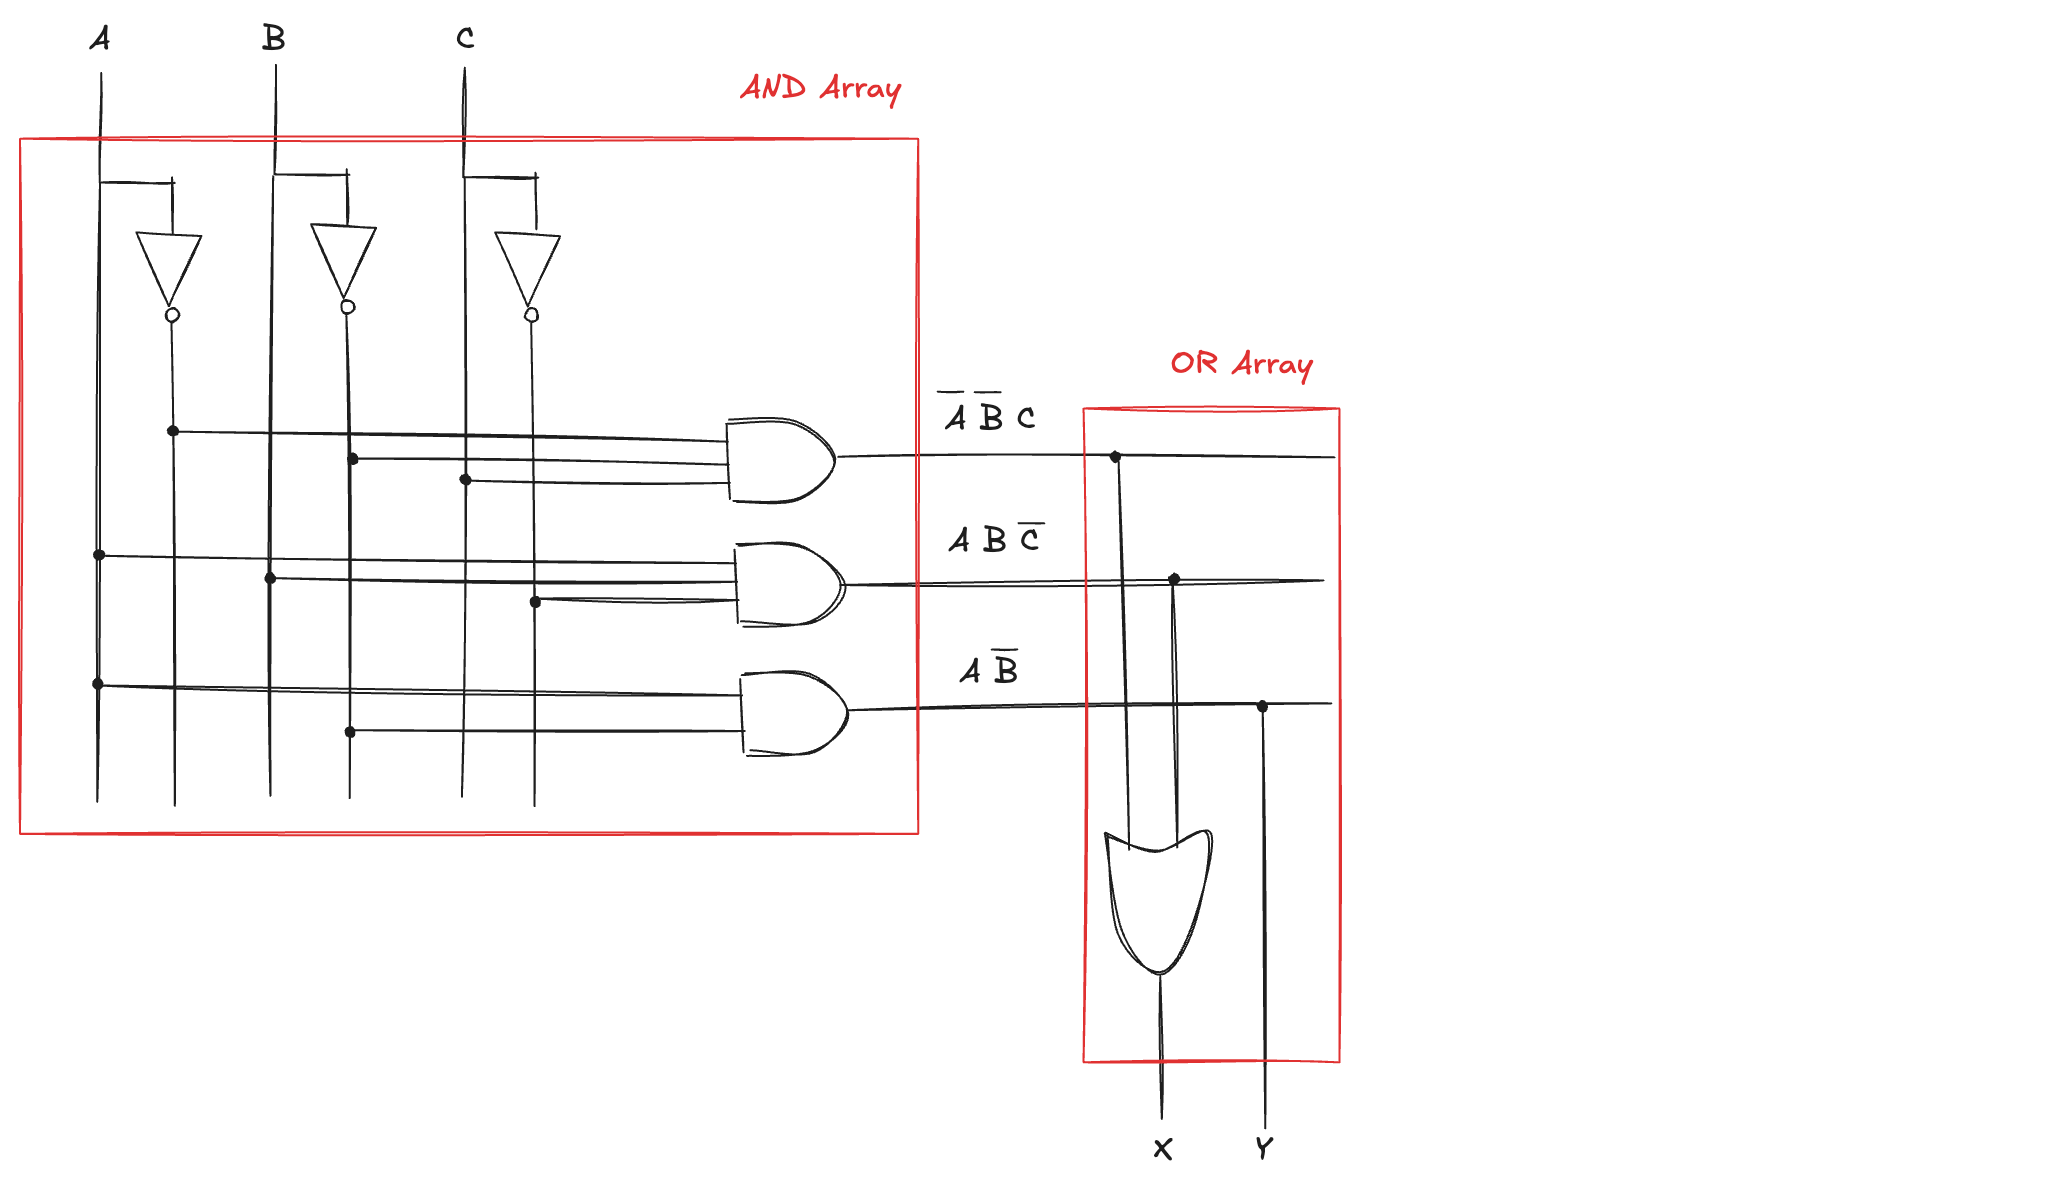

Although both LUTs and PLAs can implement arbitrary combinational logic, LUTs are preferred in modern FPGAs because they act as small memory blocks that map any truth table with uniform speed and structure, making them far more flexible, easier to configure, and more scalable than the two-level, connection-intensive architecture of PLAs.

### Field-Programmable Gate Array (FPGA)

An FPGA is built around a **large array of reconfigurable Logic Elements (LE)** that the designer can program to perform virtually any digital function. Instead of hardwiring gates during fabrication, the chip provides a pool of flexible resources that can be configured after manufacturing using a hardware description language or schematic. Each LE can implement combinational logic (typically using a LUT) and can also include flip-flops or other circuitry to support sequential behavior. Below we can consider a highly simplified diagram of a typical LE:

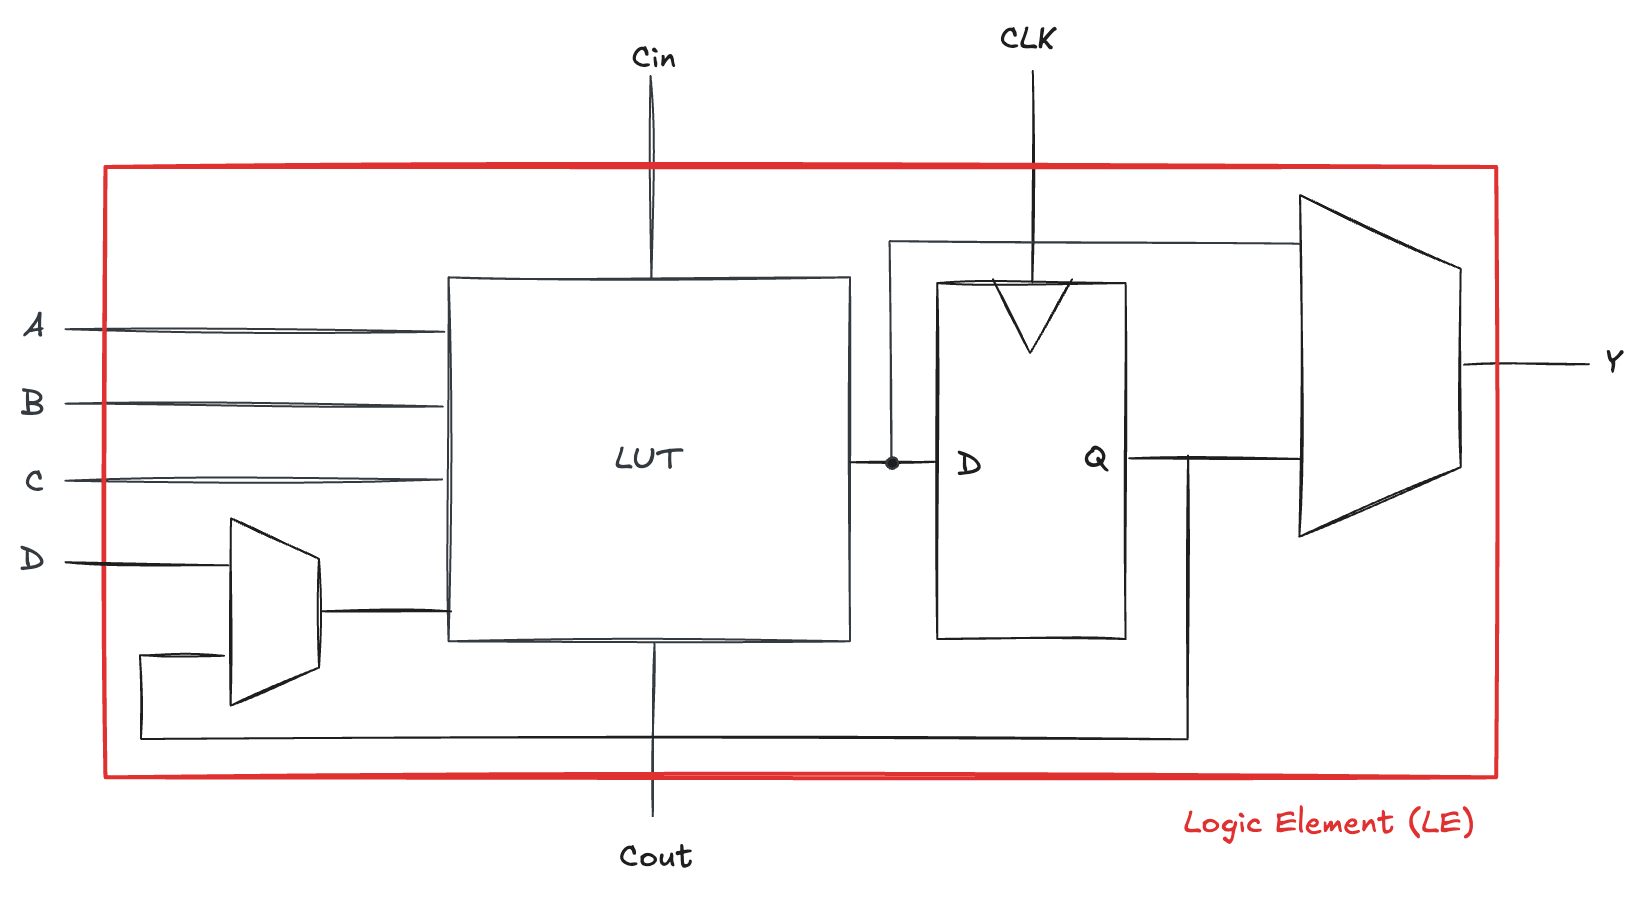

Four input signals A, B, C and D enter the logic element and feed a lookup table. The LUT has been configured to implement a specific logic function: for every possible combination of input bits, it stores the output value that the circuit designer intends. This allows the LUT to act like any Boolean gate or combination of gates. One of the inputs (D) first passes through a multiplexer. This selection gives the logic element flexibility to choose between different internal or external signals before they reach the LUT. In addition to these data inputs, the block includes a dedicated carry-in signal, Cin, which connects to the LUT and is part of the fast arithmetic chain used for operations such as addition. The corresponding carry-out, Cout, leaves the logic element so that neighbouring elements can be linked together efficiently. The output of the LUT can go in two different directions. It may be sent straight to the output multiplexer, providing a purely combinational function whose output changes immediately in response to changes at the inputs. Alternatively, the LUT output may be routed into a D-type flip-flop. This flip-flop captures the value of the LUT on the rising edge of the clock and holds it stable until the next clock event. The presence of the flip-flop enables the FPGA to build synchronous sequential circuits where timing and state play an essential role. The output of the logic element is chosen by a multiplexer that selects either the direct LUT value or the stored value from the flip-flop. The result Y becomes the observable output of the element and can be routed to other logic elements or off-chip pins. Even though this representation is simplified, it shows the key idea: a logic element combines **flexible combinational logic, optional state storage, and fast arithmetic support**, and can be connected with many other elements to construct complex digital systems inside an FPGA.

We can consider the **internal structure of a real logic element**, the following diagram shows an LE from **Intel’s Cyclone IV architecture**: 

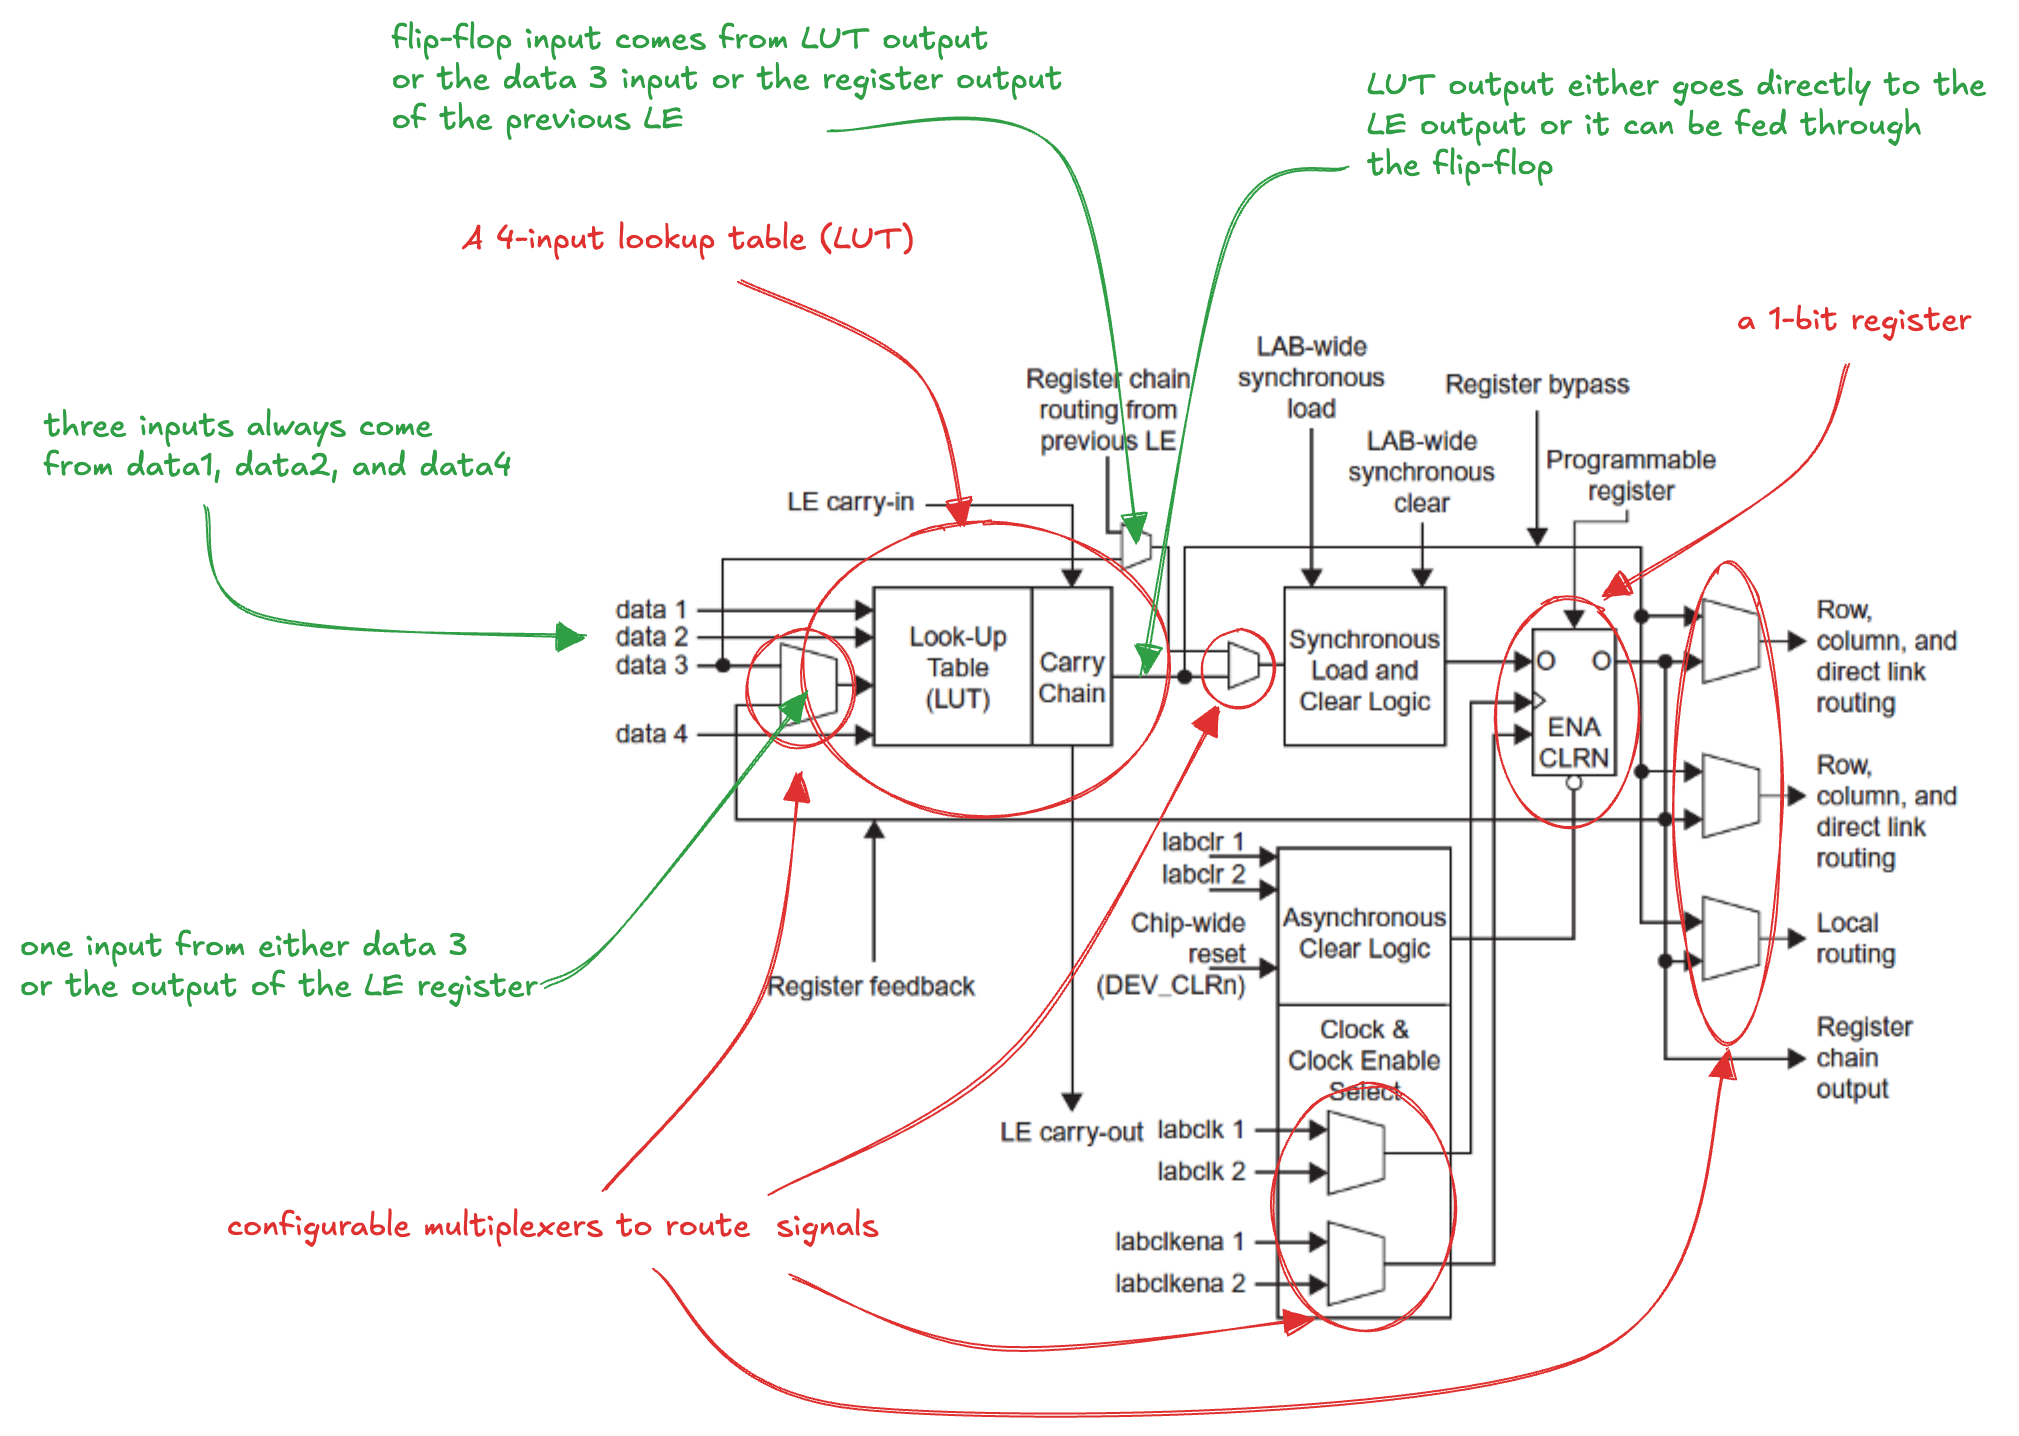

A single logic cell is a compact and elegant building block, but **the real power of an FPGA emerges from scale**. Each cell can be connected (flexibly and dynamically) to many others, allowing thousands of these simple elements to cooperate in implementing complex digital systems:

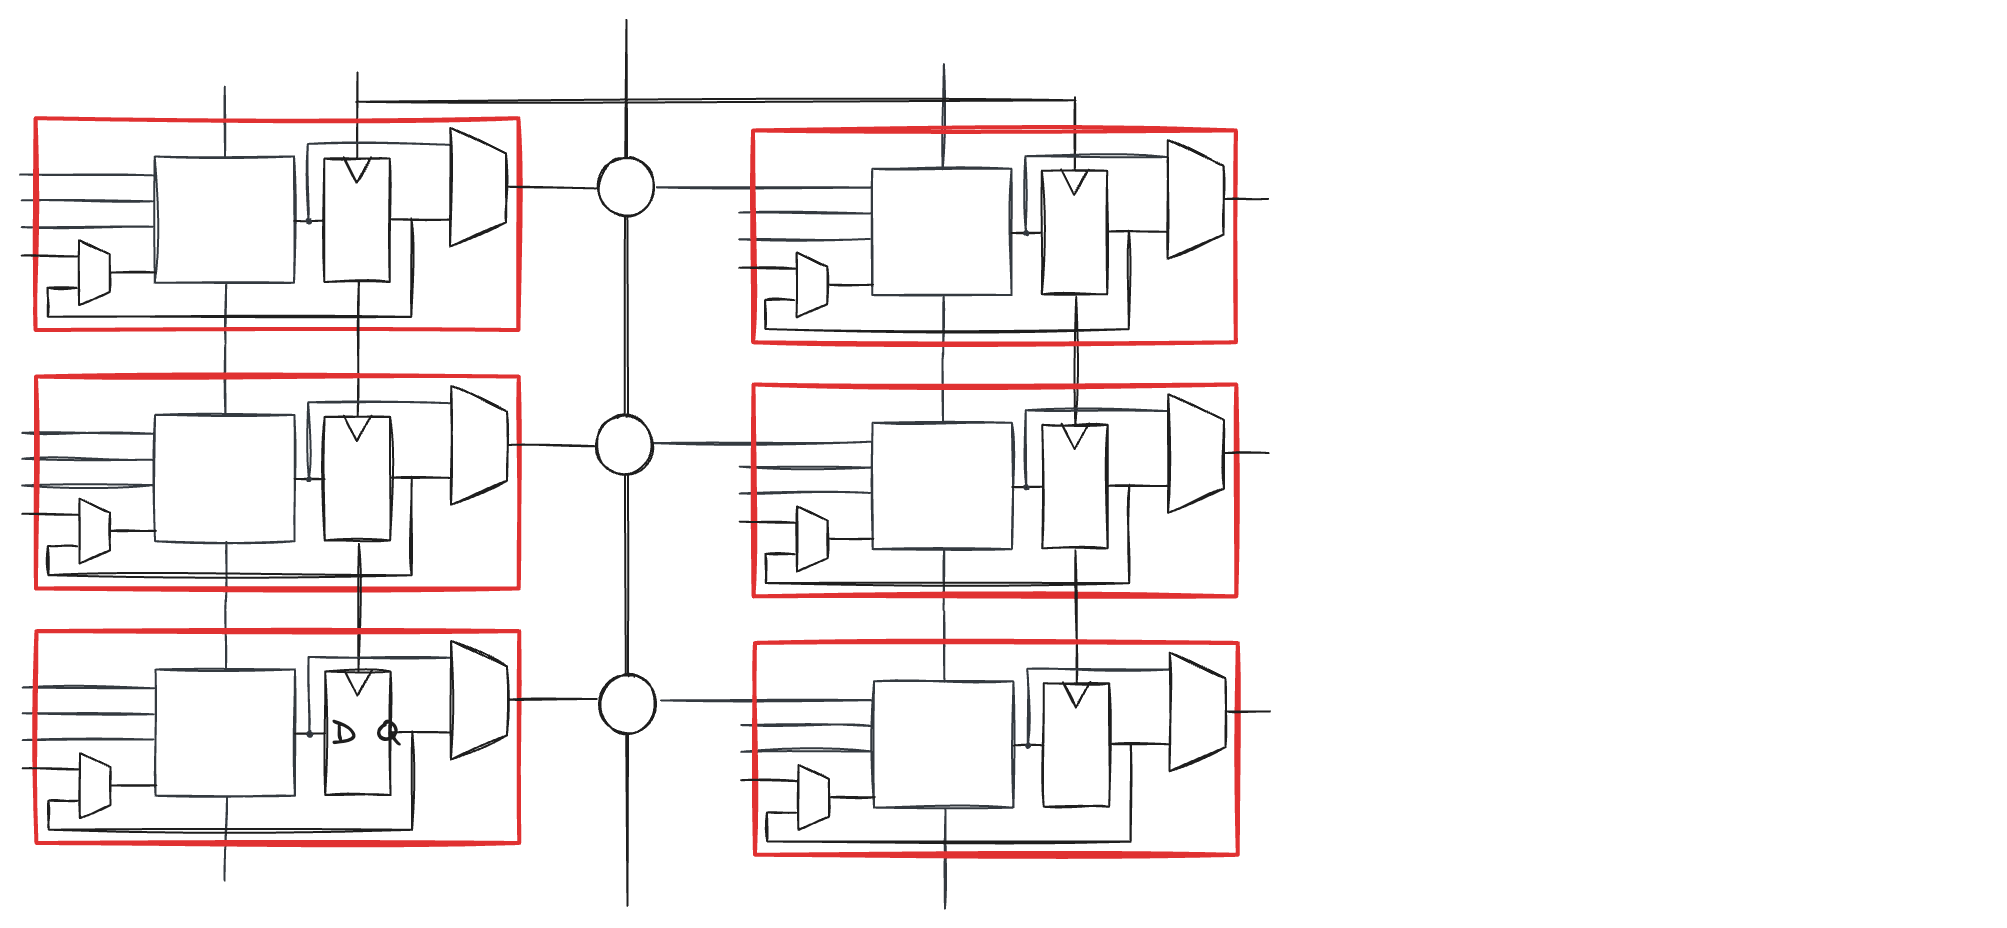

The large circles in the middle of the diagram represent **programmable routing switches** that allow the output of a logic cell to be directed almost anywhere on the chip. This drawing is, of course, highly simplified; real FPGAs contain a much denser web of interconnects, with many more wires and switches than we could reasonably show here.

Carry-in and carry-out pins become important when implementing arithmetic. Although each LUT typically contains only a one-bit adder, the carry chain allows these one-bit slices to be linked together to form wider adders and counters. Because these carry paths are dedicated, fast, and bypass much of the general routing fabric, they give FPGAs a significant performance edge over other forms of programmable logic.

Digital circuits depend heavily on clock signals, so robust clocking resources are essential. Every flip-flop in every logic cell must receive a clean, low-skew clock edge, regardless of where it is located. To achieve this, FPGAs include a network of global clock lines engineered to distribute precise, low-distortion clock signals across the entire device.

Surrounding this sea of logic elements are **input/output elements** that connect the internal circuitry to the pins of the chip package, allowing the FPGA to communicate with the outside world:

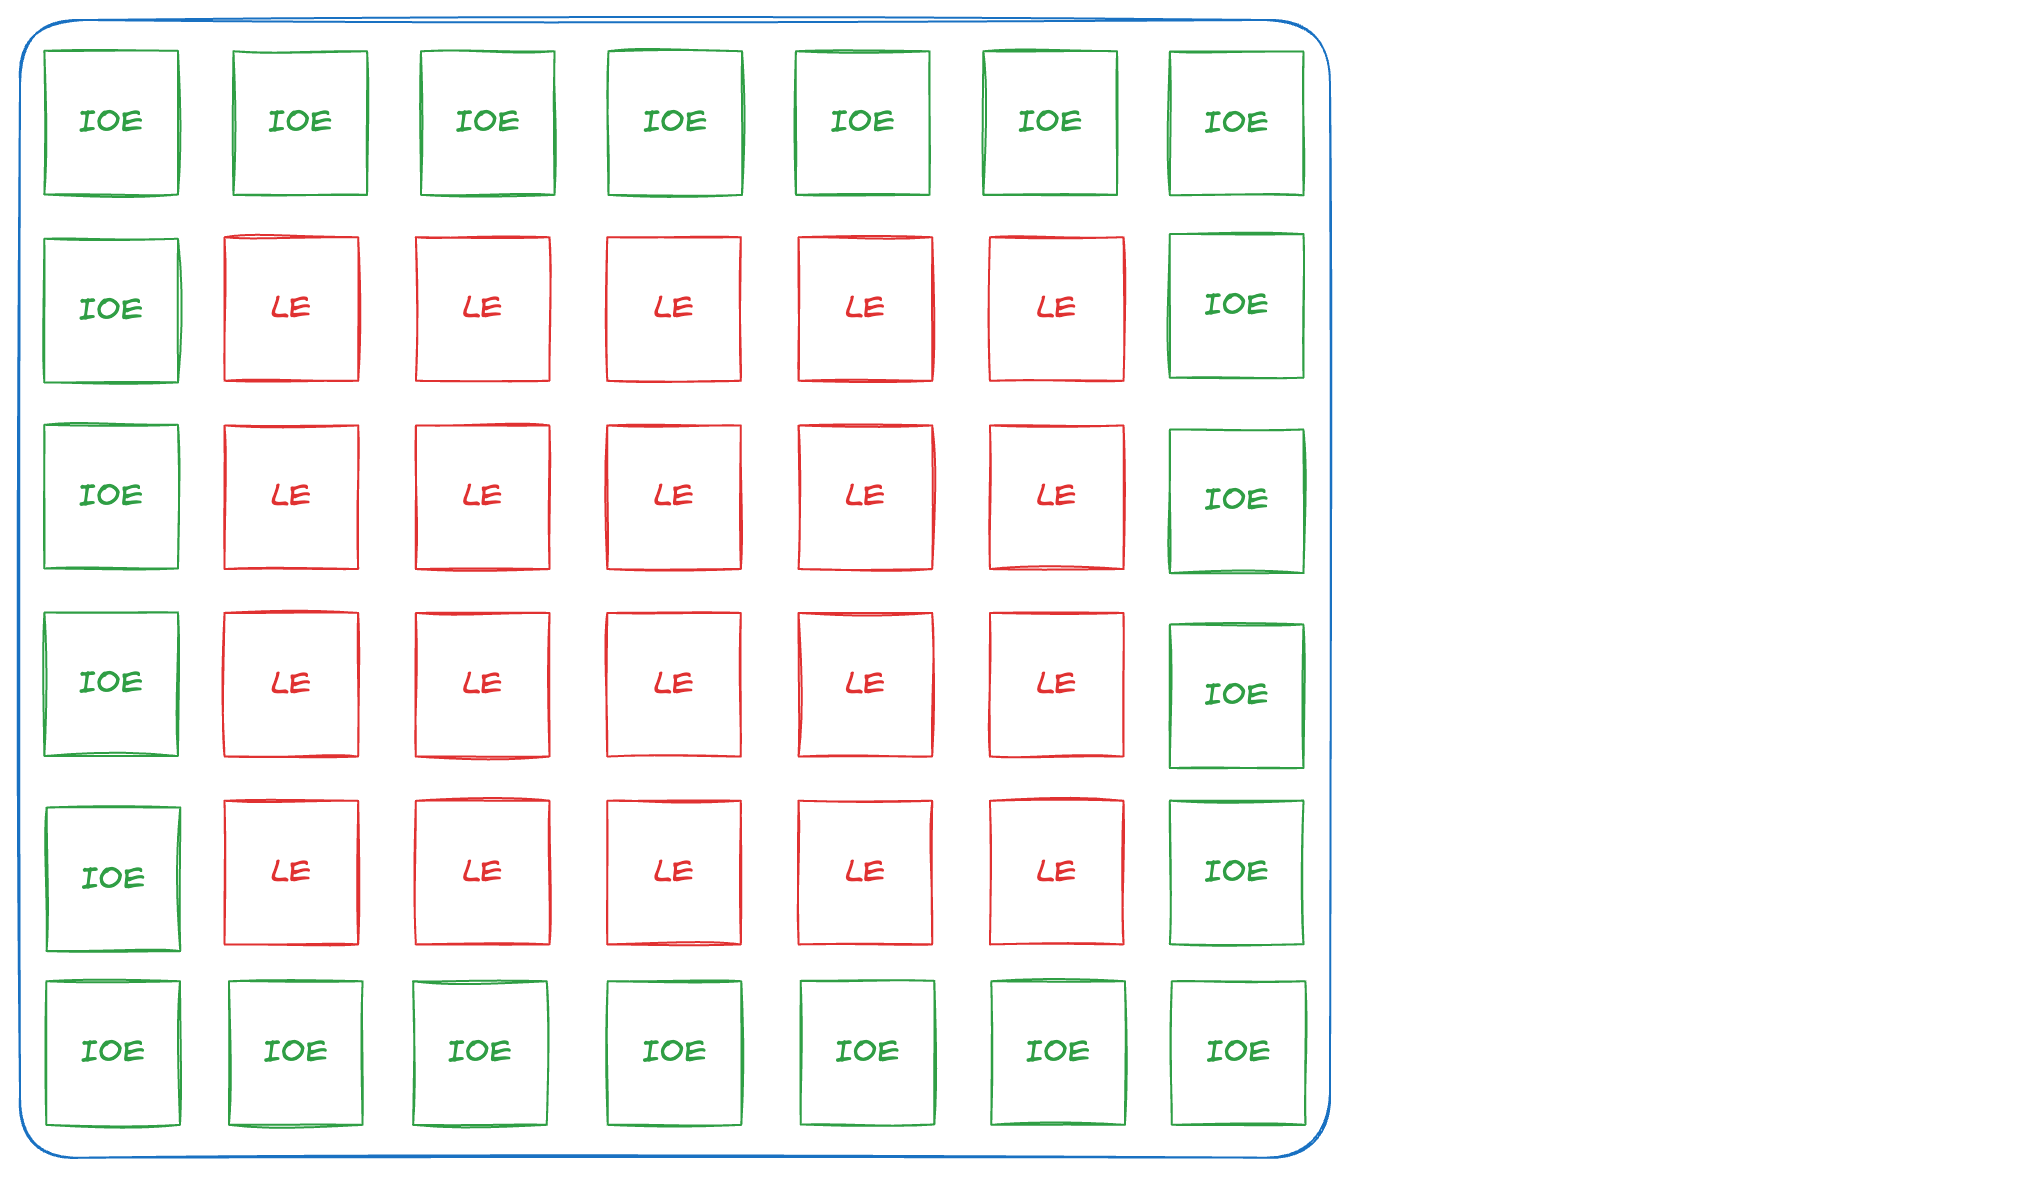

Modern FPGAs go far beyond this. By integrating **additional hardware blocks** directly on the chip, the device gains substantial functionality that cannot be matched by assembling equivalent components purely from logic cells. Dedicated circuits are almost always faster, more power-efficient, and significantly smaller in silicon area than their soft logic equivalents. One of the most important built-in resources is **memory**. Nearly all FPGAs include dedicated SRAM banks distributed across the chip. Another major enhancement in modern devices is the inclusion of **DSP slices**. These are **dedicated arithmetic units designed for high-performance digital signal processing**. A typical DSP slice includes a hardware multiplier and several adders. Many FPGAs can integrate also a variety of specialized peripherals, like analog-to-digital and digital-to-analog converters. Together, these hard peripherals expand the FPGA’s capabilities far beyond what could be achieved with logic cells alone, making the device a flexible and powerful platform for building complex digital systems. Although different manufacturers organize their FPGAs in slightly different ways, the fundamental ideas remain the same across devices. For example, Intel’s Cyclone IV uses four-input LUTs inside each logic element, while Xilinx’s 7-series families use six-input LUTs grouped into slices. Despite these architectural variations, the role of the LUTs, multiplexers, registers, and routing fabric is essentially identical: together, they form a reconfigurable platform capable of implementing a vast range of digital circuits.

The behavior of an FPGA is described using a hardware description language. Designers typically begin by writing a behavioral model and then thoroughly simulating it to uncover and correct functional errors before any hardware is configured.cOnce the design behaves correctly in simulation, the next step is to map it onto the actual FPGA. The toolchain first **synthesizes** the HDL into a **netlist**, a detailed list of the logic elements, signals, and interconnections required to implement the design. A **place-and-route** algorithm then determines where on the FPGA each logic element should reside and how the interconnect network should be used to connect them. This stage must balance multiple goals (performance, power efficiency, and resource utilization) making it a **complex optimization problem**. After placement and routing are complete, the design can be **programmed** into the FPGA. The **configuration bitstream** sets the contents of all LUTs, programs the multiplexers and routing switches, and initializes every I/O and clocking resource so that the device behaves exactly as specified. Once the synthesis and place-and-route stages are complete, the resulting configuration information is downloaded to the FPGA. Many devices are **volatile**: when power is removed, the configuration disappears, and the device must be reprogrammed at the next startup. To address this, systems typically include an external flash memory that stores the configuration bitstream and automatically reloads it into the FPGA upon power-up. Most development boards provide this capability out of the box. The 
DEEDS simulator can generate HDL descriptions from schematics, enabling students to transition seamlessly from graphical design to deployable FPGA implementations. As you will see in the next semester, this workflow makes it possible to take a circuit you have drawn, synthesize it automatically, and run it directly on a real FPGA development board.

### Comparison: FPGA vs. ASIC

**Application-Specific Integrated Circuits (ASICs)** are chips fabricated with a fixed, unchangeable hardware design. Because they are custom-built for a particular task, ASICs generally outperform FPGAs in terms of speed, power efficiency, and silicon area. FPGAs introduce overhead due to their programmable routing and configurable logic, which makes them slower and more power-hungry in most cases. However, the gap has narrowed: modern high-end FPGAs can approach ASIC performance for certain applications.

Despite this, FPGAs offer two major advantages. The first is **cost**. Producing an ASIC requires not only the behavioral design but also a full physical layout, mask creation, and wafer fabrication: an extremely expensive process. For low or moderate production volumes, FPGA-based systems are dramatically cheaper. The second advantage is **flexibility**. An FPGA can be reprogrammed any number of times, whereas an ASIC is permanent once manufactured. Even companies that ultimately plan to build an ASIC often **use FPGAs during prototyping** because the behavioral design is nearly identical, and debugging is vastly easier when the hardware can be reconfigured instantly.

The combination of reconfigurable logic, abundant routing resources, and versatile I/O makes FPGAs a powerful and adaptable device. They support both combinational and sequential designs, can be reprogrammed repeatedly, and scale well to large, complex applications. These advantages explain why FPGAs have become common in many modern products. For instance, a Mercedes-Benz S-Class contains more than a dozen Xilinx FPGAs, taking advantage of their flexibility, performance, and rapid time-to-market. Their ability to be reconfigured after deployment also makes them ideal for prototyping, updating functionality, and building systems that may need to evolve over time.